In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Module 1: Data Acquisition and Preprocessing:

## 1. Data Acquisition:

In [2]:
data = pd.read_json('electronics.json') #reading dataset
df = data.to_csv('electronics.csv', index=False) #converting dataset to csv format
df = pd.read_csv('electronics.csv') #reading csv file
 
#Converting columns to their respective datatypes
df['Age'] = pd.to_numeric(df['Age'], errors='coerce').astype('Int64') #coerce replaces non-numeric values to NAN
df['Purchase_Date'] = pd.to_datetime(df['Purchase_Date'], errors='coerce')
df['Purchase_Amount'] = pd.to_numeric(df['Purchase_Amount'], errors='coerce').astype('Int64')
df['Average_Spending_Per_Purchase'] = pd.to_numeric(df['Average_Spending_Per_Purchase'], errors='coerce').astype('Int64')
df['Purchase_Frequency_Per_Month'] = pd.to_numeric(df['Purchase_Frequency_Per_Month'], errors='coerce').astype('Int64')
df['Brand_Affinity_Score'] = pd.to_numeric(df['Brand_Affinity_Score'], errors='coerce').astype('Int64')
df['Month'] = pd.to_numeric(df['Month'], errors='coerce').astype('Int64')
df['Year'] = pd.to_numeric(df['Year'], errors='coerce').astype('Int64')

nonnumeric_cols = ['Customer_ID', 'Gender', 'Income_Level', 'Address',
                   'Transaction_ID', 'Product_ID', 'Product_Category', 
                   'Brand', 'Product_Category_Preferences', 'Season']

#loop to find hidden values in dataset and replace it with null value
for col in nonnumeric_cols:
    for x in df.index:
        if df.loc[x, col] == 'Hidden':
            df.loc[x, col] = np.nan


print("Missing values in dataset: ")
missing = df.isnull().sum()
print(missing)
print()

required_columns = ['Customer_ID', 'Age', 'Gender', 'Income_Level', 'Address',
                    'Transaction_ID', 'Purchase_Date', 'Product_ID', 'Product_Category',
                    'Brand', 'Purchase_Amount', 'Average_Spending_Per_Purchase',
                    'Purchase_Frequency_Per_Month', 'Brand_Affinity_Score',
                    'Product_Category_Preferences', 'Month', 'Year', 'Season']

if all(col in df.columns for col in required_columns):
    print("Dataset contains all required information.")
else:
    print("Dataset is missing some required information.")


Missing values in dataset: 
Customer_ID                      44
Age                              40
Gender                           48
Income_Level                     50
Address                          47
Transaction_ID                   50
Purchase_Date                    48
Product_ID                       49
Product_Category                 60
Brand                            58
Purchase_Amount                  49
Average_Spending_Per_Purchase    40
Purchase_Frequency_Per_Month     55
Brand_Affinity_Score             61
Product_Category_Preferences     43
Month                            53
Year                             52
Season                           48
dtype: int64

Dataset contains all required information.


## 2. Data Cleaning:

In [3]:
#Handling missing values 
#df['Customer_ID'].dropna(axis='columns', how='any', inplace=True) #not correct
# df['Customer_ID'].fillna(method='ffill', inplace=True)
df.dropna(subset='Customer_ID', inplace=True)
df['Age'].fillna(method='ffill', inplace=True)   #inplace makes changes in dataframe when its true
df['Gender'].fillna('Other', inplace=True)
df['Income_Level'].fillna(df['Income_Level'].mode().iloc[0], inplace=True)  # iloc[0] selects the mode values
df['Address'].fillna('Unknown', inplace=True)
df.dropna(subset='Transaction_ID', inplace=True)
df['Purchase_Date'].fillna(method='ffill', inplace=True)
df.dropna(subset='Product_ID', inplace=True)
df['Product_Category'].fillna(df['Product_Category'].mode().iloc[0], inplace=True)
df['Brand'].fillna(df['Brand'].mode().iloc[0], inplace=True)
df['Purchase_Amount'].fillna(method='ffill', inplace=True)
df['Average_Spending_Per_Purchase'].fillna(method='ffill', inplace=True)
df['Purchase_Frequency_Per_Month'].fillna(method='ffill', inplace=True)
df['Brand_Affinity_Score'].fillna(method='ffill', inplace=True)
df['Product_Category_Preferences'].fillna(df['Product_Category_Preferences'].mode().iloc[0], inplace=True)
df['Month'].fillna(method='ffill', inplace=True)
df['Year'].fillna(method='ffill', inplace=True)
df['Season'].fillna(df['Season'].mode().iloc[0], inplace=True)
#print(df)

missing_values = df.isnull().sum()
print(missing_values)

df3 = df
df3


Customer_ID                      0
Age                              0
Gender                           0
Income_Level                     0
Address                          0
Transaction_ID                   0
Purchase_Date                    0
Product_ID                       0
Product_Category                 0
Brand                            0
Purchase_Amount                  0
Average_Spending_Per_Purchase    0
Purchase_Frequency_Per_Month     0
Brand_Affinity_Score             0
Product_Category_Preferences     0
Month                            0
Year                             0
Season                           0
dtype: int64


,Customer_ID,Age,Gender,Income_Level,Address,Transaction_ID,Purchase_Date,Product_ID,Product_Category,Brand,Purchase_Amount,Average_Spending_Per_Purchase,Purchase_Frequency_Per_Month,Brand_Affinity_Score,Product_Category_Preferences,Month,Year,Season
0,b81ee6c9-2ae4-48a7-b283-220eaa244f43,40,Female,Medium,"43548 Murray Islands Suite 974\nAmyberg, CT 13457",c6a6c712-e36b-406a-bfde-f53bdcf4744f,2022-04-26,d2f767d6-b01a-41a2-87f7-ec1d1186f50e,Clothing,Brand_C,193,59,2,2,Low,1,2010,Winter
2,fdf79bcd-5908-4c90-8501-570ffb5b7648,57,Other,Low,"79683 Kevin Hill Apt. 555\nJohnshire, AR 39961",462925b1-a5bf-4996-bda2-59749de64eea,2021-12-09,9ab75a68-4329-4bd9-a259-2233c0f34c93,Electronics,Brand_A,197,100,9,1,Low,1,1995,Winter
3,878dccba-893a-48f9-8d34-6ed394fa3c9c,38,Female,Medium,02998 Hall Meadows Suite 809\nNorth Robertvill...,3cfafa02-6b34-4d77-9e05-d223dfab64e8,2022-12-03,d518569b-ff79-494b-b2b6-7e2af39db86a,Clothing,Brand_C,262,97,3,4,Low,9,2012,Fall
4,0af0bd81-73cc-494e-aa5e-75c6d0b6d743,68,Other,Medium,"21411 Timothy Ford Apt. 320\nDavisborough, AR ...",0d8dc27a-0c8f-4a82-b57e-8bf54cee9759,2020-06-08,b6deac9d-2b7e-4a51-8273-a6534910b3bc,Books,Brand_B,429,85,7,2,High,1,2010,Summer
5,5a4ac4ce-1e09-4ecb-805c-fb676f101385,26,Other,High,"843 John Knoll Suite 876\nRodriguezmouth, MO 3...",5b0d927b-a342-4df1-8846-a1acc62e2842,2022-12-03,03f82332-801c-45e2-84bf-af10a8f60248,Books,Brand_A,57,21,2,6,High,8,1989,Spring
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
994,b17a7ab6-f7c6-4f76-81e4-2b7536730065,65,Female,High,"0676 Gonzalez Pike Apt. 421\nAmymouth, ND 66046",0f8a3f06-1234-4774-8b2f-14d159567ea1,2022-02-11,23a4c4aa-a0bb-44ae-a5fd-817420f96b91,Clothing,Brand_B,417,71,7,4,High,6,1990,Winter
996,2116266d-8d1c-48cc-ac28-e4e675cb2a4d,78,Female,Low,"45710 Wilson Circles Apt. 411\nWalterton, NC 8...",51f771bf-2562-46c1-a25d-2f46f4bb1525,2023-08-30,546d8d8f-1498-4aa9-8123-29550d911a17,Books,Brand_B,176,53,3,3,Medium,9,1977,Winter
997,562cee08-f909-4e1c-a811-5711f967bea5,63,Male,High,"243 Emily Creek\nSouth Lindaport, CO 81594",74eba598-ee91-4396-a137-6b869702ef29,2023-08-30,8b6ffec8-de54-445c-90d0-1399858b2e16,Electronics,Brand_C,212,99,2,9,Low,12,1995,Summer
998,84da2eea-6e9e-46d4-8d94-1e9b0c377d78,43,Male,High,"1129 Kirby Ferry Suite 743\nBillyfurt, UT 41587",4d2e213e-bcc0-4a8a-9501-6ca8361381c4,2021-05-13,51ed2d86-c9ab-4922-a8ff-469acf6ac91e,Clothing,Brand_C,212,98,8,7,Low,3,2000,Fall


C:\Users\Hp\AppData\Local\Temp\ipykernel_31924\2581686750.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[var], bins=20)
C:\Users\Hp\AppData\Local\Temp\ipykernel_31924\2581686750.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[var], bins=20)
C:\Users\Hp\AppData\Local\Temp\ipykerne

,Customer_ID,Age,Gender,Income_Level,Address,Transaction_ID,Purchase_Date,Product_ID,Product_Category,Brand,Purchase_Amount,Average_Spending_Per_Purchase,Purchase_Frequency_Per_Month,Brand_Affinity_Score,Product_Category_Preferences,Month,Year,Season
0,b81ee6c9-2ae4-48a7-b283-220eaa244f43,40,Female,Medium,"43548 Murray Islands Suite 974\nAmyberg, CT 13457",c6a6c712-e36b-406a-bfde-f53bdcf4744f,2022-04-26,d2f767d6-b01a-41a2-87f7-ec1d1186f50e,Clothing,Brand_C,193,59,2,2,Low,1,2010,Winter
2,fdf79bcd-5908-4c90-8501-570ffb5b7648,57,Other,Low,"79683 Kevin Hill Apt. 555\nJohnshire, AR 39961",462925b1-a5bf-4996-bda2-59749de64eea,2021-12-09,9ab75a68-4329-4bd9-a259-2233c0f34c93,Electronics,Brand_A,197,100,9,1,Low,1,1995,Winter
3,878dccba-893a-48f9-8d34-6ed394fa3c9c,38,Female,Medium,02998 Hall Meadows Suite 809\nNorth Robertvill...,3cfafa02-6b34-4d77-9e05-d223dfab64e8,2022-12-03,d518569b-ff79-494b-b2b6-7e2af39db86a,Clothing,Brand_C,262,97,3,4,Low,9,2012,Fall
4,0af0bd81-73cc-494e-aa5e-75c6d0b6d743,68,Other,Medium,"21411 Timothy Ford Apt. 320\nDavisborough, AR ...",0d8dc27a-0c8f-4a82-b57e-8bf54cee9759,2020-06-08,b6deac9d-2b7e-4a51-8273-a6534910b3bc,Books,Brand_B,429,85,7,2,High,1,2010,Summer
5,5a4ac4ce-1e09-4ecb-805c-fb676f101385,26,Other,High,"843 John Knoll Suite 876\nRodriguezmouth, MO 3...",5b0d927b-a342-4df1-8846-a1acc62e2842,2022-12-03,03f82332-801c-45e2-84bf-af10a8f60248,Books,Brand_A,57,21,2,6,High,8,1989,Spring
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
994,b17a7ab6-f7c6-4f76-81e4-2b7536730065,65,Female,High,"0676 Gonzalez Pike Apt. 421\nAmymouth, ND 66046",0f8a3f06-1234-4774-8b2f-14d159567ea1,2022-02-11,23a4c4aa-a0bb-44ae-a5fd-817420f96b91,Clothing,Brand_B,417,71,7,4,High,6,1990,Winter
996,2116266d-8d1c-48cc-ac28-e4e675cb2a4d,78,Female,Low,"45710 Wilson Circles Apt. 411\nWalterton, NC 8...",51f771bf-2562-46c1-a25d-2f46f4bb1525,2023-08-30,546d8d8f-1498-4aa9-8123-29550d911a17,Books,Brand_B,176,53,3,3,Medium,9,1977,Winter
997,562cee08-f909-4e1c-a811-5711f967bea5,63,Male,High,"243 Emily Creek\nSouth Lindaport, CO 81594",74eba598-ee91-4396-a137-6b869702ef29,2023-08-30,8b6ffec8-de54-445c-90d0-1399858b2e16,Electronics,Brand_C,212,99,2,9,Low,12,1995,Summer
998,84da2eea-6e9e-46d4-8d94-1e9b0c377d78,43,Male,High,"1129 Kirby Ferry Suite 743\nBillyfurt, UT 41587",4d2e213e-bcc0-4a8a-9501-6ca8361381c4,2021-05-13,51ed2d86-c9ab-4922-a8ff-469acf6ac91e,Clothing,Brand_C,212,98,8,7,Low,3,2000,Fall


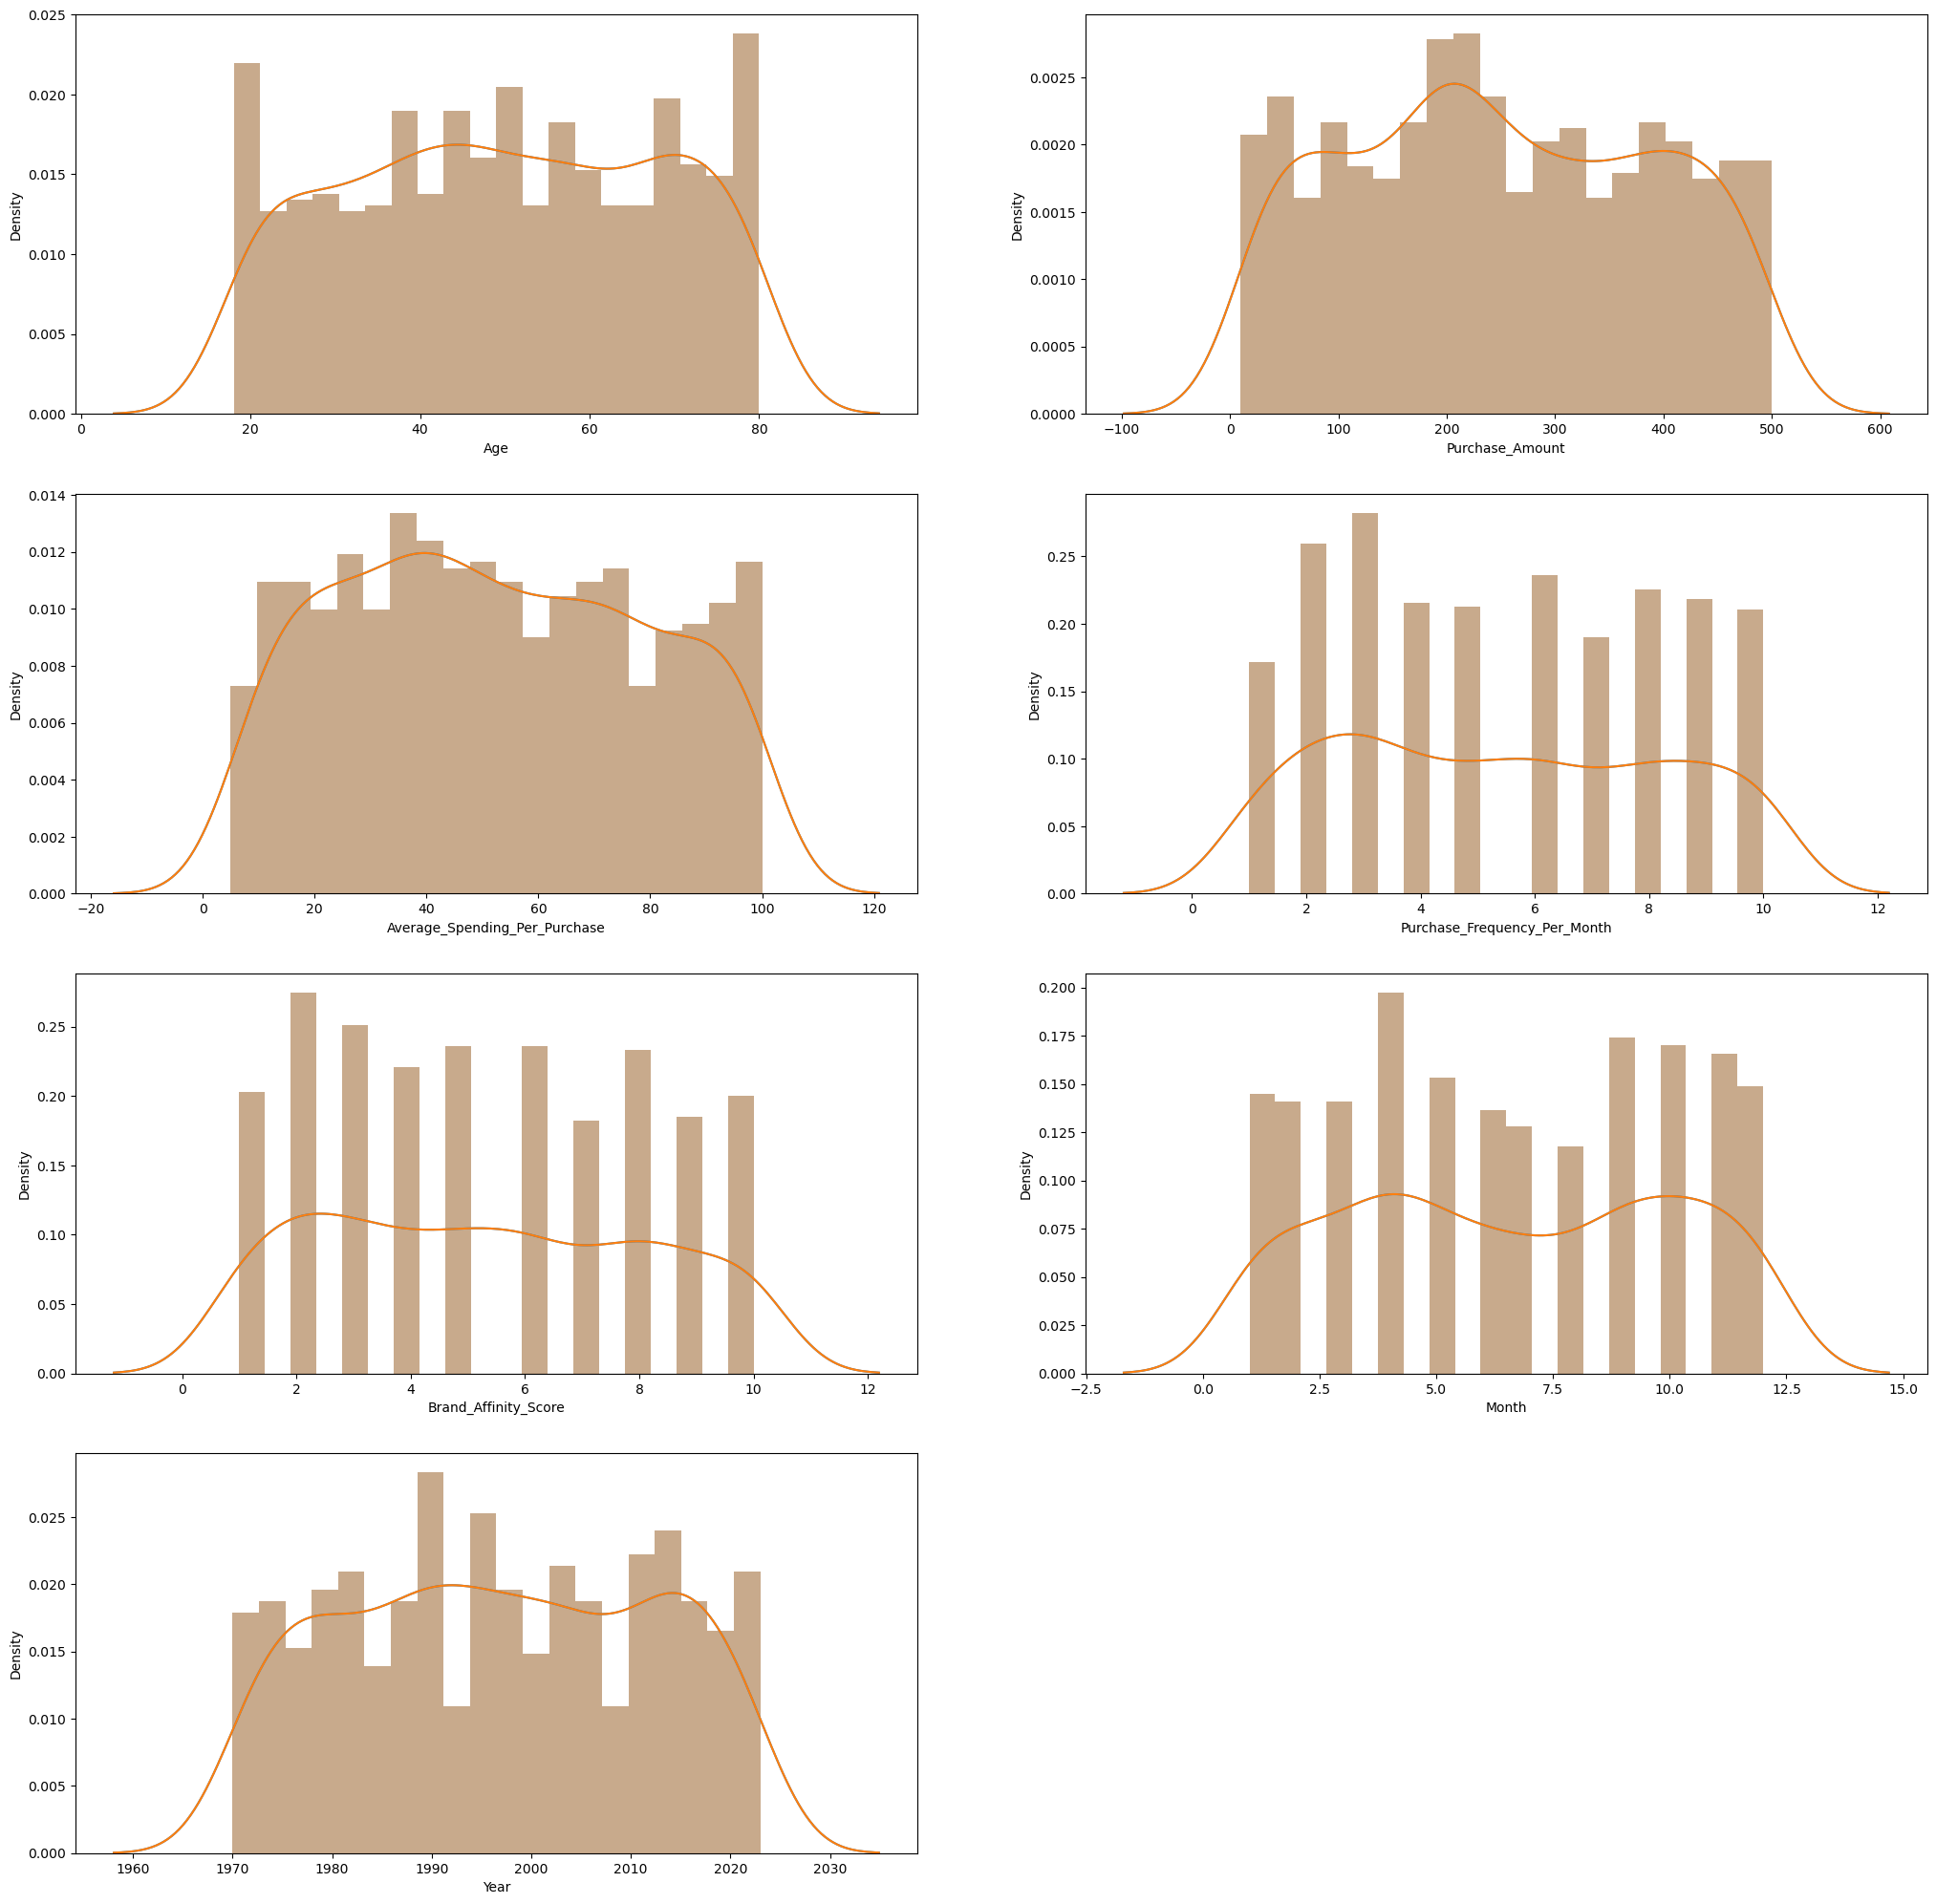

In [4]:
num_var = ['Age', 'Purchase_Amount', 'Average_Spending_Per_Purchase',
           'Purchase_Frequency_Per_Month', 'Brand_Affinity_Score', 'Month',
           'Year']

plt.figure(figsize=(25, 25))

for i, var in enumerate(num_var):  # Corrected line
    plt.subplot(4, 2, i+1)
    sns.distplot(df[var], bins=20)
    sns.distplot(df[var], bins=20)
df

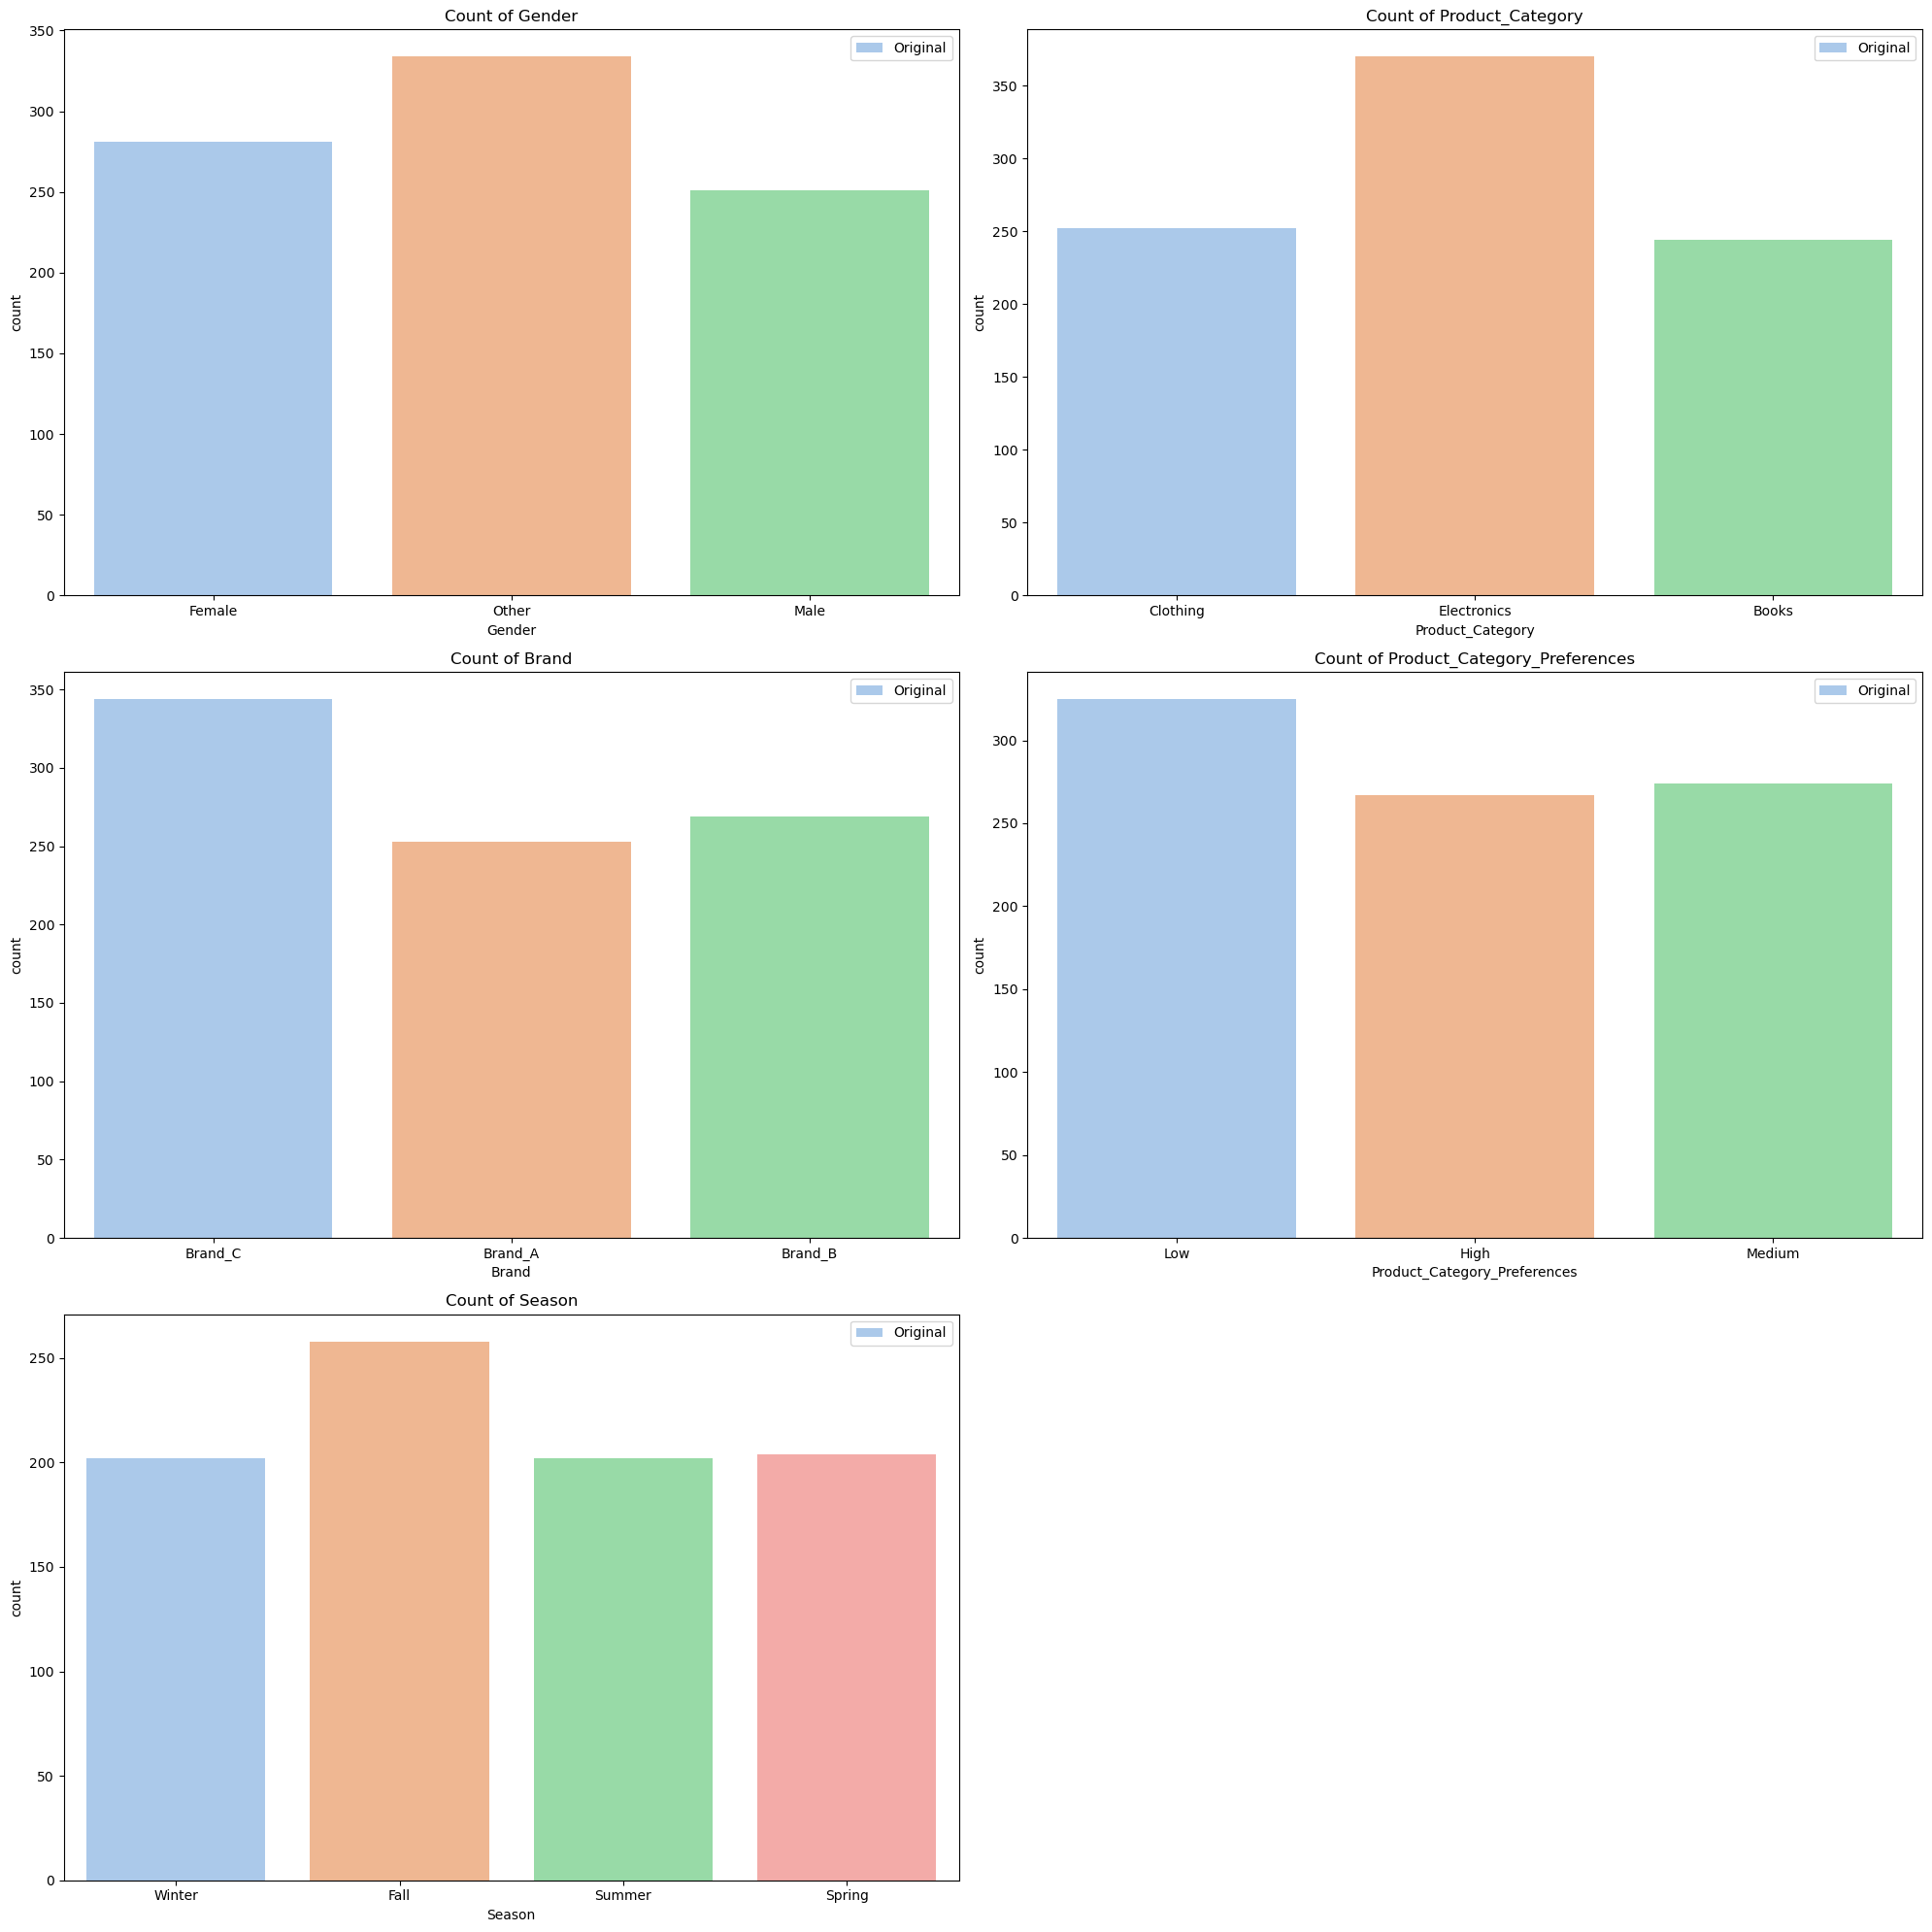

,Customer_ID,Age,Gender,Income_Level,Address,Transaction_ID,Purchase_Date,Product_ID,Product_Category,Brand,Purchase_Amount,Average_Spending_Per_Purchase,Purchase_Frequency_Per_Month,Brand_Affinity_Score,Product_Category_Preferences,Month,Year,Season
0,b81ee6c9-2ae4-48a7-b283-220eaa244f43,40,Female,Medium,"43548 Murray Islands Suite 974\nAmyberg, CT 13457",c6a6c712-e36b-406a-bfde-f53bdcf4744f,2022-04-26,d2f767d6-b01a-41a2-87f7-ec1d1186f50e,Clothing,Brand_C,193,59,2,2,Low,1,2010,Winter
2,fdf79bcd-5908-4c90-8501-570ffb5b7648,57,Other,Low,"79683 Kevin Hill Apt. 555\nJohnshire, AR 39961",462925b1-a5bf-4996-bda2-59749de64eea,2021-12-09,9ab75a68-4329-4bd9-a259-2233c0f34c93,Electronics,Brand_A,197,100,9,1,Low,1,1995,Winter
3,878dccba-893a-48f9-8d34-6ed394fa3c9c,38,Female,Medium,02998 Hall Meadows Suite 809\nNorth Robertvill...,3cfafa02-6b34-4d77-9e05-d223dfab64e8,2022-12-03,d518569b-ff79-494b-b2b6-7e2af39db86a,Clothing,Brand_C,262,97,3,4,Low,9,2012,Fall
4,0af0bd81-73cc-494e-aa5e-75c6d0b6d743,68,Other,Medium,"21411 Timothy Ford Apt. 320\nDavisborough, AR ...",0d8dc27a-0c8f-4a82-b57e-8bf54cee9759,2020-06-08,b6deac9d-2b7e-4a51-8273-a6534910b3bc,Books,Brand_B,429,85,7,2,High,1,2010,Summer
5,5a4ac4ce-1e09-4ecb-805c-fb676f101385,26,Other,High,"843 John Knoll Suite 876\nRodriguezmouth, MO 3...",5b0d927b-a342-4df1-8846-a1acc62e2842,2022-12-03,03f82332-801c-45e2-84bf-af10a8f60248,Books,Brand_A,57,21,2,6,High,8,1989,Spring
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
994,b17a7ab6-f7c6-4f76-81e4-2b7536730065,65,Female,High,"0676 Gonzalez Pike Apt. 421\nAmymouth, ND 66046",0f8a3f06-1234-4774-8b2f-14d159567ea1,2022-02-11,23a4c4aa-a0bb-44ae-a5fd-817420f96b91,Clothing,Brand_B,417,71,7,4,High,6,1990,Winter
996,2116266d-8d1c-48cc-ac28-e4e675cb2a4d,78,Female,Low,"45710 Wilson Circles Apt. 411\nWalterton, NC 8...",51f771bf-2562-46c1-a25d-2f46f4bb1525,2023-08-30,546d8d8f-1498-4aa9-8123-29550d911a17,Books,Brand_B,176,53,3,3,Medium,9,1977,Winter
997,562cee08-f909-4e1c-a811-5711f967bea5,63,Male,High,"243 Emily Creek\nSouth Lindaport, CO 81594",74eba598-ee91-4396-a137-6b869702ef29,2023-08-30,8b6ffec8-de54-445c-90d0-1399858b2e16,Electronics,Brand_C,212,99,2,9,Low,12,1995,Summer
998,84da2eea-6e9e-46d4-8d94-1e9b0c377d78,43,Male,High,"1129 Kirby Ferry Suite 743\nBillyfurt, UT 41587",4d2e213e-bcc0-4a8a-9501-6ca8361381c4,2021-05-13,51ed2d86-c9ab-4922-a8ff-469acf6ac91e,Clothing,Brand_C,212,98,8,7,Low,3,2000,Fall


In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

cat_var = ['Gender', 'Product_Category', 'Brand', 'Product_Category_Preferences', 'Season']

plt.figure(figsize=(20, 20))

# Loop through categorical variables and create subplots
for i, var in enumerate(cat_var, start=1):
    plt.subplot(3, 2, i)
    sns.countplot(data=df, x=var, palette='pastel', label='Original')
#     sns.countplot(data=df3, x=var, palette='bright', label='Modified')
    plt.title(f'Count of {var}')
    plt.legend()

plt.tight_layout()
plt.show()
df

# Categorical Variable Encoding


# Dummy Variables & One-Hot Encoding

In [6]:
df3 = df

In [7]:
dummy_df = pd.get_dummies(df3)
dummy_df

,Age,Purchase_Date,Purchase_Amount,Average_Spending_Per_Purchase,Purchase_Frequency_Per_Month,Brand_Affinity_Score,Month,Year,Customer_ID_0018cd02-5c53-4137-8a27-d54c947f193a,Customer_ID_001b9623-842a-44a9-be06-64810298863c,...,Brand_Brand_A,Brand_Brand_B,Brand_Brand_C,Product_Category_Preferences_High,Product_Category_Preferences_Low,Product_Category_Preferences_Medium,Season_Fall,Season_Spring,Season_Summer,Season_Winter
0,40,2022-04-26,193,59,2,2,1,2010,0,0,...,0,0,1,0,1,0,0,0,0,1
2,57,2021-12-09,197,100,9,1,1,1995,0,0,...,1,0,0,0,1,0,0,0,0,1
3,38,2022-12-03,262,97,3,4,9,2012,0,0,...,0,0,1,0,1,0,1,0,0,0
4,68,2020-06-08,429,85,7,2,1,2010,0,0,...,0,1,0,1,0,0,0,0,1,0
5,26,2022-12-03,57,21,2,6,8,1989,0,0,...,1,0,0,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
994,65,2022-02-11,417,71,7,4,6,1990,0,0,...,0,1,0,1,0,0,0,0,0,1
996,78,2023-08-30,176,53,3,3,9,1977,0,0,...,0,1,0,0,0,1,0,0,0,1
997,63,2023-08-30,212,99,2,9,12,1995,0,0,...,0,0,1,0,1,0,0,0,1,0
998,43,2021-05-13,212,98,8,7,3,2000,0,0,...,0,0,1,0,1,0,1,0,0,0


In [8]:
pd.get_dummies(df3, drop_first=True)

,Age,Purchase_Date,Purchase_Amount,Average_Spending_Per_Purchase,Purchase_Frequency_Per_Month,Brand_Affinity_Score,Month,Year,Customer_ID_001b9623-842a-44a9-be06-64810298863c,Customer_ID_00730d0c-3560-4e8d-af48-f13fbc9b15d9,...,Product_ID_ffe5876b-d64d-40b3-a52a-9e90f19b3404,Product_Category_Clothing,Product_Category_Electronics,Brand_Brand_B,Brand_Brand_C,Product_Category_Preferences_Low,Product_Category_Preferences_Medium,Season_Spring,Season_Summer,Season_Winter
0,40,2022-04-26,193,59,2,2,1,2010,0,0,...,0,1,0,0,1,1,0,0,0,1
2,57,2021-12-09,197,100,9,1,1,1995,0,0,...,0,0,1,0,0,1,0,0,0,1
3,38,2022-12-03,262,97,3,4,9,2012,0,0,...,0,1,0,0,1,1,0,0,0,0
4,68,2020-06-08,429,85,7,2,1,2010,0,0,...,0,0,0,1,0,0,0,0,1,0
5,26,2022-12-03,57,21,2,6,8,1989,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
994,65,2022-02-11,417,71,7,4,6,1990,0,0,...,0,1,0,1,0,0,0,0,0,1
996,78,2023-08-30,176,53,3,3,9,1977,0,0,...,0,0,0,1,0,0,1,0,0,1
997,63,2023-08-30,212,99,2,9,12,1995,0,0,...,0,0,1,0,1,1,0,0,1,0
998,43,2021-05-13,212,98,8,7,3,2000,0,0,...,0,1,0,0,1,1,0,0,0,0


# One-Hot Encoding with Scikit-learn

In [9]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder

oh_enc = OneHotEncoder(sparse_output=False)
oh_enc_arr = oh_enc.fit_transform(df3[['Gender', 'Address', 'Purchase_Date', 'Product_ID', 'Product_Category',
                         'Brand', 'Product_Category_Preferences', 'Season']])
oh_enc_arr

column_names = list(dummy_df.keys()) # Access keys and convert them to a list
print(column_names)
# oh_enc_df = pd.DataFrame(oh_enc_arr,column_names)    #error
#oh_enc_df  #error

['Age', 'Purchase_Date', 'Purchase_Amount', 'Average_Spending_Per_Purchase', 'Purchase_Frequency_Per_Month', 'Brand_Affinity_Score', 'Month', 'Year', 'Customer_ID_0018cd02-5c53-4137-8a27-d54c947f193a', 'Customer_ID_001b9623-842a-44a9-be06-64810298863c', 'Customer_ID_00730d0c-3560-4e8d-af48-f13fbc9b15d9', 'Customer_ID_00d11e12-2732-48db-a40e-2c7db68b2ac1', 'Customer_ID_01050591-9416-48d7-9d1d-d0136252eeca', 'Customer_ID_01145392-07e6-45f6-ab82-995db066119d', 'Customer_ID_0139a3e1-774e-41ea-b84d-57bf5ba78219', 'Customer_ID_01d1c961-37ee-48ab-9f12-bb8ef2e88f9b', 'Customer_ID_01f7660d-7481-406c-a002-184d2cb7d53f', 'Customer_ID_0210eb39-97ab-4c64-a994-ff743929c5a6', 'Customer_ID_0280b25c-8378-476e-a9f6-875424fe390a', 'Customer_ID_029c66c2-530c-473d-9bb9-311d0c3cca1f', 'Customer_ID_02e27bf9-dd37-49ab-8b4c-51b4a7f80284', 'Customer_ID_034c5867-c0d4-44ad-972c-4a2bccee10d8', 'Customer_ID_036f5577-591b-4185-8d1b-698ef4088f00', 'Customer_ID_0381c7a9-538b-4b59-8627-70965c20dc01', 'Customer_ID_03b63

In [10]:
#Addressing data inconsistencies in data format 

# Load the dataset with specified columns
columns_to_use = ['Customer_ID', 'Age', 'Gender', 'Income_Level', 'Address', 'Transaction_ID', 
                  'Purchase_Date', 'Product_ID', 'Product_Category', 'Brand', 'Purchase_Amount', 
                  'Average_Spending_Per_Purchase', 'Purchase_Frequency_Per_Month', 'Brand_Affinity_Score',
                  'Product_Category_Preferences']

# Standardize Data Formats
# Purchase_Date format standardization
df3['Purchase_Date'] = pd.to_datetime(df3['Purchase_Date'], errors='coerce')  # Convert to datetime

# Check and standardize numeric columns if needed
# Example: Remove currency symbols or commas and convert to numeric format
df3['Purchase_Amount'] = df3['Purchase_Amount'].replace('[\$,]', '', regex=True).astype(float)

# Encoding Consistency
# Example: Standardize Gender encoding
df3['Gender'].replace({'M': 'Male', 'F': 'Female'}, inplace=True)

 #Check unique values after transformations
print(df3['Purchase_Date'].unique())  # Check unique date formats
print(df3['Purchase_Amount'].unique())  # Check unique representations in numeric columns
print(df3['Gender'].unique())  # Check unique values in Gender column after encoding



['2022-04-26T00:00:00.000000000' '2021-12-09T00:00:00.000000000'
 '2022-12-03T00:00:00.000000000' '2020-06-08T00:00:00.000000000'
 '2021-12-22T00:00:00.000000000' '2022-09-30T00:00:00.000000000'
 '2020-07-20T00:00:00.000000000' '2022-08-02T00:00:00.000000000'
 '2022-04-12T00:00:00.000000000' '2021-11-21T00:00:00.000000000'
 '2023-06-03T00:00:00.000000000' '2022-01-07T00:00:00.000000000'
 '2022-02-02T00:00:00.000000000' '2022-05-09T00:00:00.000000000'
 '2021-11-27T00:00:00.000000000' '2020-04-15T00:00:00.000000000'
 '2020-09-16T00:00:00.000000000' '2021-03-05T00:00:00.000000000'
 '2022-04-05T00:00:00.000000000' '2022-08-07T00:00:00.000000000'
 '2023-08-16T00:00:00.000000000' '2022-04-01T00:00:00.000000000'
 '2020-03-04T00:00:00.000000000' '2023-05-19T00:00:00.000000000'
 '2021-10-31T00:00:00.000000000' '2020-10-07T00:00:00.000000000'
 '2023-07-08T00:00:00.000000000' '2022-01-14T00:00:00.000000000'
 '2021-01-18T00:00:00.000000000' '2020-05-23T00:00:00.000000000'
 '2022-04-02T00:00:00.000

In [11]:

df3

,Customer_ID,Age,Gender,Income_Level,Address,Transaction_ID,Purchase_Date,Product_ID,Product_Category,Brand,Purchase_Amount,Average_Spending_Per_Purchase,Purchase_Frequency_Per_Month,Brand_Affinity_Score,Product_Category_Preferences,Month,Year,Season
0,b81ee6c9-2ae4-48a7-b283-220eaa244f43,40,Female,Medium,"43548 Murray Islands Suite 974\nAmyberg, CT 13457",c6a6c712-e36b-406a-bfde-f53bdcf4744f,2022-04-26,d2f767d6-b01a-41a2-87f7-ec1d1186f50e,Clothing,Brand_C,193.0,59,2,2,Low,1,2010,Winter
2,fdf79bcd-5908-4c90-8501-570ffb5b7648,57,Other,Low,"79683 Kevin Hill Apt. 555\nJohnshire, AR 39961",462925b1-a5bf-4996-bda2-59749de64eea,2021-12-09,9ab75a68-4329-4bd9-a259-2233c0f34c93,Electronics,Brand_A,197.0,100,9,1,Low,1,1995,Winter
3,878dccba-893a-48f9-8d34-6ed394fa3c9c,38,Female,Medium,02998 Hall Meadows Suite 809\nNorth Robertvill...,3cfafa02-6b34-4d77-9e05-d223dfab64e8,2022-12-03,d518569b-ff79-494b-b2b6-7e2af39db86a,Clothing,Brand_C,262.0,97,3,4,Low,9,2012,Fall
4,0af0bd81-73cc-494e-aa5e-75c6d0b6d743,68,Other,Medium,"21411 Timothy Ford Apt. 320\nDavisborough, AR ...",0d8dc27a-0c8f-4a82-b57e-8bf54cee9759,2020-06-08,b6deac9d-2b7e-4a51-8273-a6534910b3bc,Books,Brand_B,429.0,85,7,2,High,1,2010,Summer
5,5a4ac4ce-1e09-4ecb-805c-fb676f101385,26,Other,High,"843 John Knoll Suite 876\nRodriguezmouth, MO 3...",5b0d927b-a342-4df1-8846-a1acc62e2842,2022-12-03,03f82332-801c-45e2-84bf-af10a8f60248,Books,Brand_A,57.0,21,2,6,High,8,1989,Spring
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
994,b17a7ab6-f7c6-4f76-81e4-2b7536730065,65,Female,High,"0676 Gonzalez Pike Apt. 421\nAmymouth, ND 66046",0f8a3f06-1234-4774-8b2f-14d159567ea1,2022-02-11,23a4c4aa-a0bb-44ae-a5fd-817420f96b91,Clothing,Brand_B,417.0,71,7,4,High,6,1990,Winter
996,2116266d-8d1c-48cc-ac28-e4e675cb2a4d,78,Female,Low,"45710 Wilson Circles Apt. 411\nWalterton, NC 8...",51f771bf-2562-46c1-a25d-2f46f4bb1525,2023-08-30,546d8d8f-1498-4aa9-8123-29550d911a17,Books,Brand_B,176.0,53,3,3,Medium,9,1977,Winter
997,562cee08-f909-4e1c-a811-5711f967bea5,63,Male,High,"243 Emily Creek\nSouth Lindaport, CO 81594",74eba598-ee91-4396-a137-6b869702ef29,2023-08-30,8b6ffec8-de54-445c-90d0-1399858b2e16,Electronics,Brand_C,212.0,99,2,9,Low,12,1995,Summer
998,84da2eea-6e9e-46d4-8d94-1e9b0c377d78,43,Male,High,"1129 Kirby Ferry Suite 743\nBillyfurt, UT 41587",4d2e213e-bcc0-4a8a-9501-6ca8361381c4,2021-05-13,51ed2d86-c9ab-4922-a8ff-469acf6ac91e,Clothing,Brand_C,212.0,98,8,7,Low,3,2000,Fall


In [12]:
df

,Customer_ID,Age,Gender,Income_Level,Address,Transaction_ID,Purchase_Date,Product_ID,Product_Category,Brand,Purchase_Amount,Average_Spending_Per_Purchase,Purchase_Frequency_Per_Month,Brand_Affinity_Score,Product_Category_Preferences,Month,Year,Season
0,b81ee6c9-2ae4-48a7-b283-220eaa244f43,40,Female,Medium,"43548 Murray Islands Suite 974\nAmyberg, CT 13457",c6a6c712-e36b-406a-bfde-f53bdcf4744f,2022-04-26,d2f767d6-b01a-41a2-87f7-ec1d1186f50e,Clothing,Brand_C,193.0,59,2,2,Low,1,2010,Winter
2,fdf79bcd-5908-4c90-8501-570ffb5b7648,57,Other,Low,"79683 Kevin Hill Apt. 555\nJohnshire, AR 39961",462925b1-a5bf-4996-bda2-59749de64eea,2021-12-09,9ab75a68-4329-4bd9-a259-2233c0f34c93,Electronics,Brand_A,197.0,100,9,1,Low,1,1995,Winter
3,878dccba-893a-48f9-8d34-6ed394fa3c9c,38,Female,Medium,02998 Hall Meadows Suite 809\nNorth Robertvill...,3cfafa02-6b34-4d77-9e05-d223dfab64e8,2022-12-03,d518569b-ff79-494b-b2b6-7e2af39db86a,Clothing,Brand_C,262.0,97,3,4,Low,9,2012,Fall
4,0af0bd81-73cc-494e-aa5e-75c6d0b6d743,68,Other,Medium,"21411 Timothy Ford Apt. 320\nDavisborough, AR ...",0d8dc27a-0c8f-4a82-b57e-8bf54cee9759,2020-06-08,b6deac9d-2b7e-4a51-8273-a6534910b3bc,Books,Brand_B,429.0,85,7,2,High,1,2010,Summer
5,5a4ac4ce-1e09-4ecb-805c-fb676f101385,26,Other,High,"843 John Knoll Suite 876\nRodriguezmouth, MO 3...",5b0d927b-a342-4df1-8846-a1acc62e2842,2022-12-03,03f82332-801c-45e2-84bf-af10a8f60248,Books,Brand_A,57.0,21,2,6,High,8,1989,Spring
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
994,b17a7ab6-f7c6-4f76-81e4-2b7536730065,65,Female,High,"0676 Gonzalez Pike Apt. 421\nAmymouth, ND 66046",0f8a3f06-1234-4774-8b2f-14d159567ea1,2022-02-11,23a4c4aa-a0bb-44ae-a5fd-817420f96b91,Clothing,Brand_B,417.0,71,7,4,High,6,1990,Winter
996,2116266d-8d1c-48cc-ac28-e4e675cb2a4d,78,Female,Low,"45710 Wilson Circles Apt. 411\nWalterton, NC 8...",51f771bf-2562-46c1-a25d-2f46f4bb1525,2023-08-30,546d8d8f-1498-4aa9-8123-29550d911a17,Books,Brand_B,176.0,53,3,3,Medium,9,1977,Winter
997,562cee08-f909-4e1c-a811-5711f967bea5,63,Male,High,"243 Emily Creek\nSouth Lindaport, CO 81594",74eba598-ee91-4396-a137-6b869702ef29,2023-08-30,8b6ffec8-de54-445c-90d0-1399858b2e16,Electronics,Brand_C,212.0,99,2,9,Low,12,1995,Summer
998,84da2eea-6e9e-46d4-8d94-1e9b0c377d78,43,Male,High,"1129 Kirby Ferry Suite 743\nBillyfurt, UT 41587",4d2e213e-bcc0-4a8a-9501-6ca8361381c4,2021-05-13,51ed2d86-c9ab-4922-a8ff-469acf6ac91e,Clothing,Brand_C,212.0,98,8,7,Low,3,2000,Fall


# DATA TRANSFORMATIOM

In [13]:
print(df.columns)
df['Total_Monthly_Spending'] = df['Average_Spending_Per_Purchase'] * df['Purchase_Frequency_Per_Month']
# df['Category_Diversity'] = df['Product_Category_Preferences'].apply(lambda x: len(set(x.split(','))))
df['Spending_Score'] = (df['Average_Spending_Per_Purchase'] * df['Purchase_Frequency_Per_Month']) + df['Brand_Affinity_Score']
df

Index(['Customer_ID', 'Age', 'Gender', 'Income_Level', 'Address',
       'Transaction_ID', 'Purchase_Date', 'Product_ID', 'Product_Category',
       'Brand', 'Purchase_Amount', 'Average_Spending_Per_Purchase',
       'Purchase_Frequency_Per_Month', 'Brand_Affinity_Score',
       'Product_Category_Preferences', 'Month', 'Year', 'Season'],
      dtype='object')


,Customer_ID,Age,Gender,Income_Level,Address,Transaction_ID,Purchase_Date,Product_ID,Product_Category,Brand,Purchase_Amount,Average_Spending_Per_Purchase,Purchase_Frequency_Per_Month,Brand_Affinity_Score,Product_Category_Preferences,Month,Year,Season,Total_Monthly_Spending,Spending_Score
0,b81ee6c9-2ae4-48a7-b283-220eaa244f43,40,Female,Medium,"43548 Murray Islands Suite 974\nAmyberg, CT 13457",c6a6c712-e36b-406a-bfde-f53bdcf4744f,2022-04-26,d2f767d6-b01a-41a2-87f7-ec1d1186f50e,Clothing,Brand_C,193.0,59,2,2,Low,1,2010,Winter,118,120
2,fdf79bcd-5908-4c90-8501-570ffb5b7648,57,Other,Low,"79683 Kevin Hill Apt. 555\nJohnshire, AR 39961",462925b1-a5bf-4996-bda2-59749de64eea,2021-12-09,9ab75a68-4329-4bd9-a259-2233c0f34c93,Electronics,Brand_A,197.0,100,9,1,Low,1,1995,Winter,900,901
3,878dccba-893a-48f9-8d34-6ed394fa3c9c,38,Female,Medium,02998 Hall Meadows Suite 809\nNorth Robertvill...,3cfafa02-6b34-4d77-9e05-d223dfab64e8,2022-12-03,d518569b-ff79-494b-b2b6-7e2af39db86a,Clothing,Brand_C,262.0,97,3,4,Low,9,2012,Fall,291,295
4,0af0bd81-73cc-494e-aa5e-75c6d0b6d743,68,Other,Medium,"21411 Timothy Ford Apt. 320\nDavisborough, AR ...",0d8dc27a-0c8f-4a82-b57e-8bf54cee9759,2020-06-08,b6deac9d-2b7e-4a51-8273-a6534910b3bc,Books,Brand_B,429.0,85,7,2,High,1,2010,Summer,595,597
5,5a4ac4ce-1e09-4ecb-805c-fb676f101385,26,Other,High,"843 John Knoll Suite 876\nRodriguezmouth, MO 3...",5b0d927b-a342-4df1-8846-a1acc62e2842,2022-12-03,03f82332-801c-45e2-84bf-af10a8f60248,Books,Brand_A,57.0,21,2,6,High,8,1989,Spring,42,48
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
994,b17a7ab6-f7c6-4f76-81e4-2b7536730065,65,Female,High,"0676 Gonzalez Pike Apt. 421\nAmymouth, ND 66046",0f8a3f06-1234-4774-8b2f-14d159567ea1,2022-02-11,23a4c4aa-a0bb-44ae-a5fd-817420f96b91,Clothing,Brand_B,417.0,71,7,4,High,6,1990,Winter,497,501
996,2116266d-8d1c-48cc-ac28-e4e675cb2a4d,78,Female,Low,"45710 Wilson Circles Apt. 411\nWalterton, NC 8...",51f771bf-2562-46c1-a25d-2f46f4bb1525,2023-08-30,546d8d8f-1498-4aa9-8123-29550d911a17,Books,Brand_B,176.0,53,3,3,Medium,9,1977,Winter,159,162
997,562cee08-f909-4e1c-a811-5711f967bea5,63,Male,High,"243 Emily Creek\nSouth Lindaport, CO 81594",74eba598-ee91-4396-a137-6b869702ef29,2023-08-30,8b6ffec8-de54-445c-90d0-1399858b2e16,Electronics,Brand_C,212.0,99,2,9,Low,12,1995,Summer,198,207
998,84da2eea-6e9e-46d4-8d94-1e9b0c377d78,43,Male,High,"1129 Kirby Ferry Suite 743\nBillyfurt, UT 41587",4d2e213e-bcc0-4a8a-9501-6ca8361381c4,2021-05-13,51ed2d86-c9ab-4922-a8ff-469acf6ac91e,Clothing,Brand_C,212.0,98,8,7,Low,3,2000,Fall,784,791


In [14]:
#Normalizing numeric features
from sklearn.preprocessing import MinMaxScaler

normalize_columns = ['Total_Monthly_Spending', 'Spending_Score']
scaler = MinMaxScaler() #creates a min max scaler
df[normalize_columns] = scaler.fit_transform(df[normalize_columns])
df

,Customer_ID,Age,Gender,Income_Level,Address,Transaction_ID,Purchase_Date,Product_ID,Product_Category,Brand,Purchase_Amount,Average_Spending_Per_Purchase,Purchase_Frequency_Per_Month,Brand_Affinity_Score,Product_Category_Preferences,Month,Year,Season,Total_Monthly_Spending,Spending_Score
0,b81ee6c9-2ae4-48a7-b283-220eaa244f43,40,Female,Medium,"43548 Murray Islands Suite 974\nAmyberg, CT 13457",c6a6c712-e36b-406a-bfde-f53bdcf4744f,2022-04-26,d2f767d6-b01a-41a2-87f7-ec1d1186f50e,Clothing,Brand_C,193.0,59,2,2,Low,1,2010,Winter,0.114721,0.110324
2,fdf79bcd-5908-4c90-8501-570ffb5b7648,57,Other,Low,"79683 Kevin Hill Apt. 555\nJohnshire, AR 39961",462925b1-a5bf-4996-bda2-59749de64eea,2021-12-09,9ab75a68-4329-4bd9-a259-2233c0f34c93,Electronics,Brand_A,197.0,100,9,1,Low,1,1995,Winter,0.908629,0.900810
3,878dccba-893a-48f9-8d34-6ed394fa3c9c,38,Female,Medium,02998 Hall Meadows Suite 809\nNorth Robertvill...,3cfafa02-6b34-4d77-9e05-d223dfab64e8,2022-12-03,d518569b-ff79-494b-b2b6-7e2af39db86a,Clothing,Brand_C,262.0,97,3,4,Low,9,2012,Fall,0.290355,0.287449
4,0af0bd81-73cc-494e-aa5e-75c6d0b6d743,68,Other,Medium,"21411 Timothy Ford Apt. 320\nDavisborough, AR ...",0d8dc27a-0c8f-4a82-b57e-8bf54cee9759,2020-06-08,b6deac9d-2b7e-4a51-8273-a6534910b3bc,Books,Brand_B,429.0,85,7,2,High,1,2010,Summer,0.598985,0.593117
5,5a4ac4ce-1e09-4ecb-805c-fb676f101385,26,Other,High,"843 John Knoll Suite 876\nRodriguezmouth, MO 3...",5b0d927b-a342-4df1-8846-a1acc62e2842,2022-12-03,03f82332-801c-45e2-84bf-af10a8f60248,Books,Brand_A,57.0,21,2,6,High,8,1989,Spring,0.037563,0.037449
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
994,b17a7ab6-f7c6-4f76-81e4-2b7536730065,65,Female,High,"0676 Gonzalez Pike Apt. 421\nAmymouth, ND 66046",0f8a3f06-1234-4774-8b2f-14d159567ea1,2022-02-11,23a4c4aa-a0bb-44ae-a5fd-817420f96b91,Clothing,Brand_B,417.0,71,7,4,High,6,1990,Winter,0.499492,0.495951
996,2116266d-8d1c-48cc-ac28-e4e675cb2a4d,78,Female,Low,"45710 Wilson Circles Apt. 411\nWalterton, NC 8...",51f771bf-2562-46c1-a25d-2f46f4bb1525,2023-08-30,546d8d8f-1498-4aa9-8123-29550d911a17,Books,Brand_B,176.0,53,3,3,Medium,9,1977,Winter,0.156345,0.152834
997,562cee08-f909-4e1c-a811-5711f967bea5,63,Male,High,"243 Emily Creek\nSouth Lindaport, CO 81594",74eba598-ee91-4396-a137-6b869702ef29,2023-08-30,8b6ffec8-de54-445c-90d0-1399858b2e16,Electronics,Brand_C,212.0,99,2,9,Low,12,1995,Summer,0.195939,0.198381
998,84da2eea-6e9e-46d4-8d94-1e9b0c377d78,43,Male,High,"1129 Kirby Ferry Suite 743\nBillyfurt, UT 41587",4d2e213e-bcc0-4a8a-9501-6ca8361381c4,2021-05-13,51ed2d86-c9ab-4922-a8ff-469acf6ac91e,Clothing,Brand_C,212.0,98,8,7,Low,3,2000,Fall,0.790863,0.789474


# Module 2: Exploratory Data Analysis(EDA):

## 1. Univariate Analysis:

Age                             float64
Purchase_Amount                   Int64
Purchase_Frequency_Per_Month    float64
dtype: object
Customer_ID                      0
Age                              0
Gender                           0
Income_Level                     0
Address                          0
Transaction_ID                   0
Purchase_Date                    0
Product_ID                       0
Product_Category                 0
Brand                            0
Purchase_Amount                  0
Average_Spending_Per_Purchase    0
Purchase_Frequency_Per_Month     0
Brand_Affinity_Score             0
Product_Category_Preferences     0
Month                            0
Year                             0
Season                           0
Total_Monthly_Spending           0
Spending_Score                   0
dtype: int64


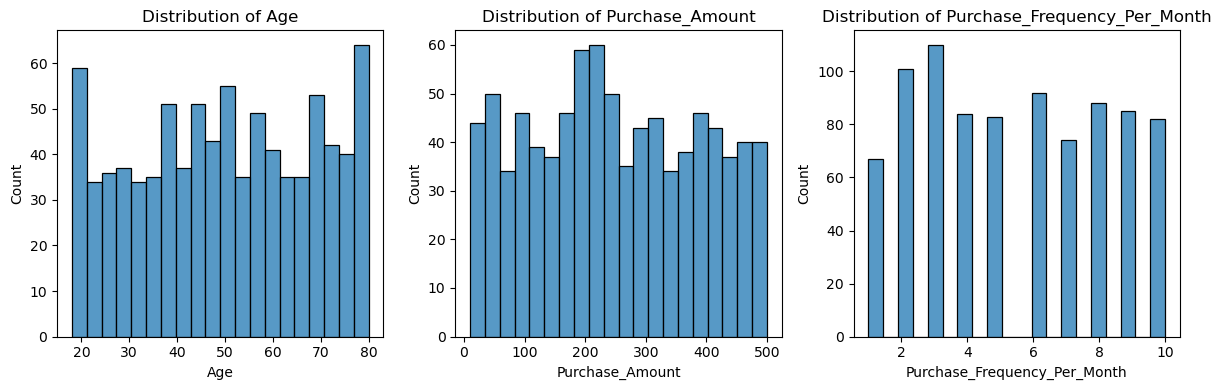

In [40]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

df3['Purchase_Amount'] = pd.to_numeric(df3['Purchase_Amount'], errors='coerce').astype('Int64')
columns_to_analyze = ['Age', 'Purchase_Amount', 'Purchase_Frequency_Per_Month']

print(df3[columns_to_analyze].dtypes)
missing = df3.isnull().sum()
print(missing)

df3 = df3.dropna(subset=columns_to_analyze)
df3[columns_to_analyze] = df3[columns_to_analyze].apply(pd.to_numeric, errors='coerce')

# Histograms for distribution analysis
plt.figure(figsize=(12, 4))
for i, column in enumerate(columns_to_analyze, 1):
    plt.subplot(1, 3, i)
    
    # Check for negative values and replace them with NaN
    df3[column] = np.where(df3[column] < 0, np.nan, df3[column])
    
    sns.histplot(df3[column], bins=20)
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
plt.tight_layout()
plt.show()


## Findings

•	Most customers fall into two main age brackets—around 20 years old and between 50 to 60 years old.

•	People mostly buy things that are either cheap (costing 0-100 units) or quite expensive (costing 400-500 units).

•	Customers tend to make purchases either twice a month or eight times a month.

These details help to understand the ages of the customers, what price range they usually spend in, and how often they make purchases.

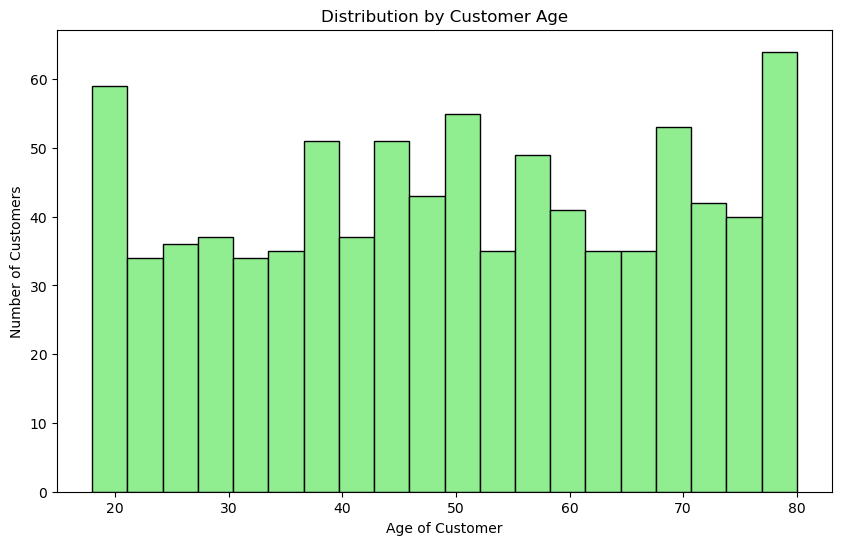

In [16]:
plt.figure(figsize=(10,6))
plt.hist(df['Age'], bins=20, color='lightgreen', edgecolor='black')
plt.title('Distribution by Customer Age')
plt.xlabel('Age of Customer')
plt.ylabel('Number of Customers')
plt.show()



## Findings

•	There are many customers around 20 years old and around 80 years old. These age groups have the most customers.

•	There are customers between 30 and 70 years old, but not as many as the younger and older age groups.

•	Overall, there's a wide range of ages among customers, with both younger and older folks making up a big part of the             customer base.

Knowing this helps understand that customers vary in age, which could be useful for tailoring products or services to different age groups.

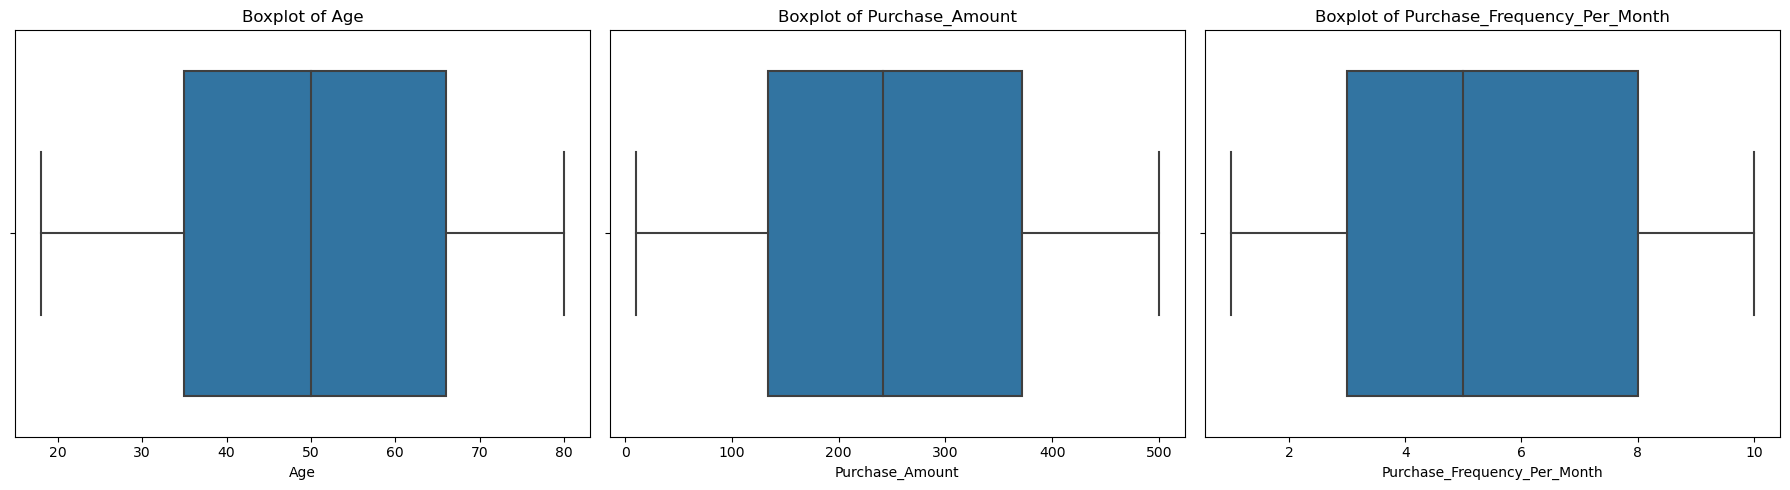

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select columns for boxplot analysis
columns_for_boxplot = ['Age', 'Purchase_Amount', 'Purchase_Frequency_Per_Month']

# Create subplots for boxplots
fig, axes = plt.subplots(nrows=1, ncols=len(columns_for_boxplot), figsize=(18, 5))

# Loop through selected columns for boxplot visualization
for i, column in enumerate(columns_for_boxplot):
    sns.boxplot(x=df3[column], ax=axes[i])
    axes[i].set_title(f'Boxplot of {column}')
    axes[i].set_xlabel(column)

plt.tight_layout()
plt.show()


•	Most of our customers are around 50 years old, but we have quite a few between 40 and 60 years old.

•	When customers shop, they typically spend around 300 units. Usually, it's between 200 and 400 units.

•	Customers usually shop about 4 times a month, mostly between 3 to 5 times.

So, our main customers are middle-aged, spending a moderate amount when they shop and visiting us a few times every month.

In [18]:
# Select columns for descriptive statistics
columns_for_stats = ['Age', 'Purchase_Amount', 'Purchase_Frequency_Per_Month']

# Descriptive statistics for insights
stats = df3[columns_for_stats].describe()
print(stats)

        Age  Purchase_Amount  Purchase_Frequency_Per_Month
count   866              866                           866
unique   63              396                            10
top      38               39                             3
freq     24                8                           110


Skewness:
Age                            -0.036135
Purchase_Amount                 0.056610
Purchase_Frequency_Per_Month    0.081821
dtype: float64


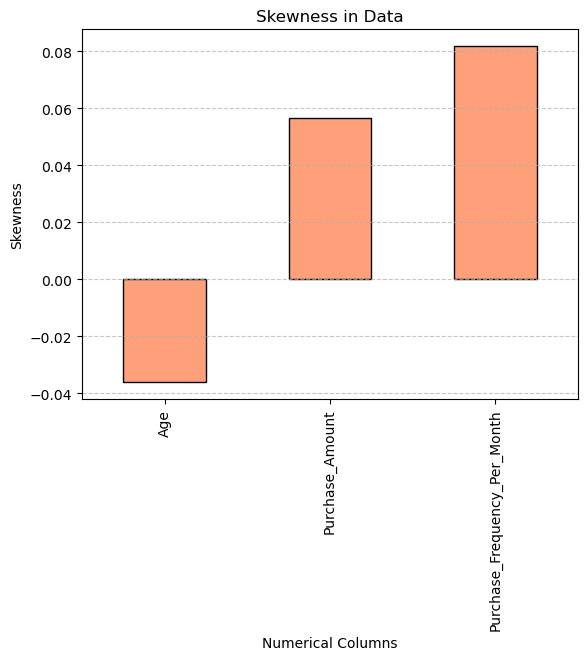

In [19]:
import seaborn as sns

numerical_columns = ['Age', 'Purchase_Amount', 'Purchase_Frequency_Per_Month']

skewness = df3[numerical_columns].skew() #calculate skewness
print("Skewness:")
print(skewness)

#visualize skewness
skewness.plot(kind='bar', color='lightsalmon', edgecolor='black')
plt.xlabel('Numerical Columns')
plt.ylabel('Skewness')
plt.title('Skewness in Data')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=90)
plt.show()

•	The data for “Age” is slightly leaning to the left. This means there are a bit more older customers than younger ones.

•	The data for “Purchase Amount” is leaning to the right. This means most customers tend to make smaller purchases, with a few     customers making larger purchases.

•	The data for “Purchase Frequency per Month” is also leaning to the right. This indicates that most customers shop less           frequently, with a few customers shopping more often.

We have a bit more older customers, and while most customers tend to make smaller, less frequent purchases, there are a few who shop big and often.


In [20]:
numerical_columns = ['Age', 'Purchase_Amount', 'Purchase_Frequency_Per_Month']

# detect outliers using IQR
def detect_outliers_iqr(df, col):
    Q1, Q3 = df[col].quantile([0.25, 0.75])
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    return outliers

# Detect and display outliers for each numerical column
for col in numerical_columns:
    outliers = detect_outliers_iqr(df3, col)
    print(f"Outliers in {col}:")
    if not outliers.empty:
        print(f"Number of outliers: {outliers.shape[0]}")
        print(f"Indices of outliers:")
        print(outliers.index.tolist())
    else:
        print("No outliers found.")
    print()

Outliers in Age:
No outliers found.

Outliers in Purchase_Amount:
No outliers found.

Outliers in Purchase_Frequency_Per_Month:
No outliers found.



## 2. Bivariate Analysis:

Index(['Customer_ID', 'Age', 'Gender', 'Income_Level', 'Address',
       'Transaction_ID', 'Purchase_Date', 'Product_ID', 'Product_Category',
       'Brand', 'Purchase_Amount', 'Average_Spending_Per_Purchase',
       'Purchase_Frequency_Per_Month', 'Brand_Affinity_Score',
       'Product_Category_Preferences', 'Month', 'Year', 'Season',
       'Total_Monthly_Spending', 'Spending_Score'],
      dtype='object')


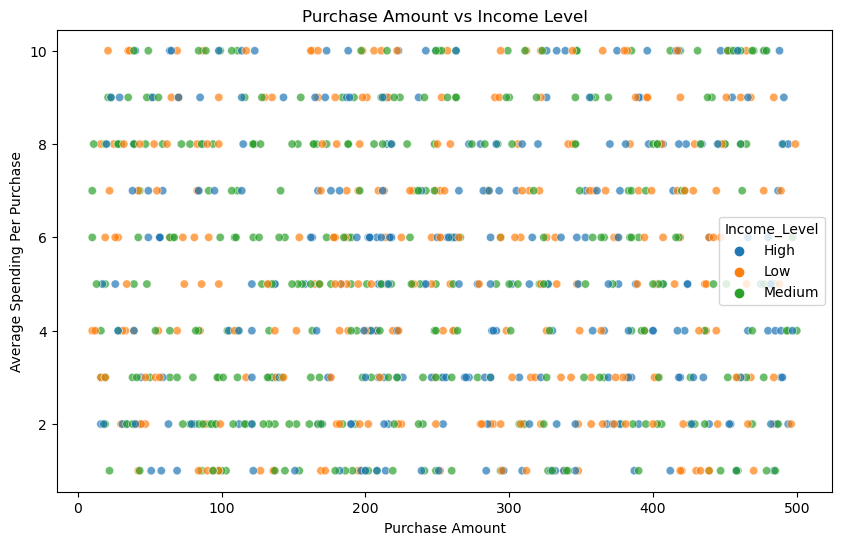

In [21]:
print(df.columns)

cat_column = 'Income_Level'
numeric_column1 = 'Purchase_Amount'
numeric_column2 = 'Average_Spending_Per_Purchase'

df['Income_Level'] = df['Income_Level'].astype('category')

plt.figure(figsize=(10,6))
plt.title("Purchase Amount vs Income Level")
sns.scatterplot(x='Purchase_Amount', y='Brand_Affinity_Score', hue='Income_Level', data=df, alpha=0.7)
# sns.stripplot(x='Purchase_Amount', y='Income_Level', hue='Income_Level', data=df, jitter=True, palette='pastel', alpha=0.7)
plt.xlabel('Purchase Amount')
plt.ylabel('Average Spending Per Purchase')
plt.show()

•	The age data is slightly skewed to the left. This means that there are a bit more older customers than younger ones.

•	The purchase amount data is skewed to the right. This means that while most customers tend to make smaller purchases, there     are a few who make larger purchases.

•	The purchase frequency data is also skewed to the right. This means that while most customers shop less frequently, there       are a few who shop more often.

We have a bit more older customers, and while most customers tend to make smaller, less frequent purchases, there are a few who shop big and often.


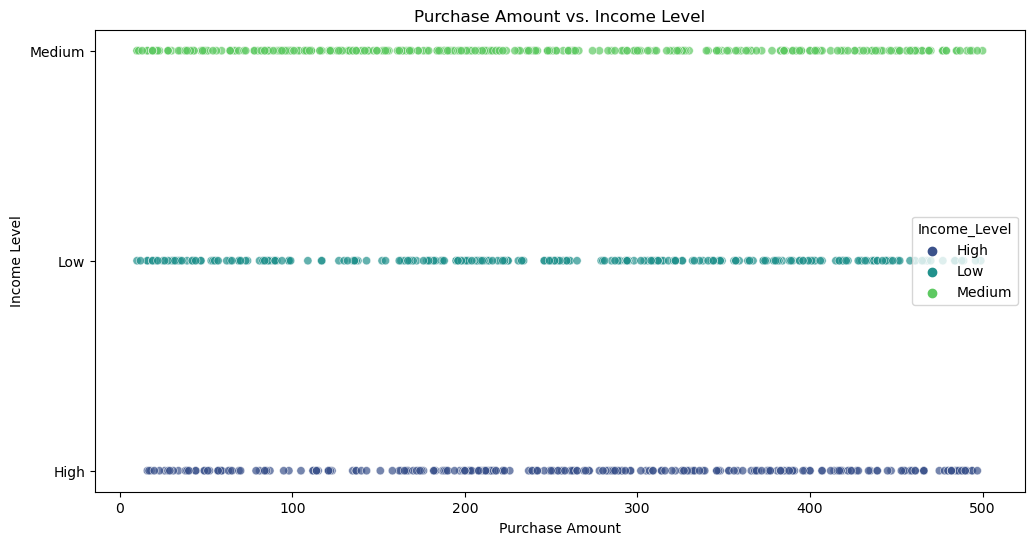

In [22]:
df['Income_Level_Encoded'] = df['Income_Level'].astype('category').cat.codes

plt.figure(figsize=(12, 6))
sns.scatterplot(x='Purchase_Amount', y='Income_Level_Encoded', hue='Income_Level', data=df, palette='viridis', alpha=0.7)
plt.yticks(df['Income_Level_Encoded'].unique(), df['Income_Level'].unique())  # Set y-axis ticks to original labels
plt.title('Purchase Amount vs. Income Level')
plt.xlabel('Purchase Amount')
plt.ylabel('Income Level')
plt.show()

•	People with low income mostly have their purchase amounts concentrated around 0 to 200. This means they tend to spend less       on purchases.

•	People with a medium income have a consistent purchase amount ranging from 0 to 500. This suggests they have a wide range of     spending habits.

•	Individuals with high incomes have their purchases spread but more concentrated from 300 to 500. This indicates that they       tend to spend more on purchases.

People with higher income tend to spend more, while those with lower income spend less. People with a medium income show a wide range of spending habits. 


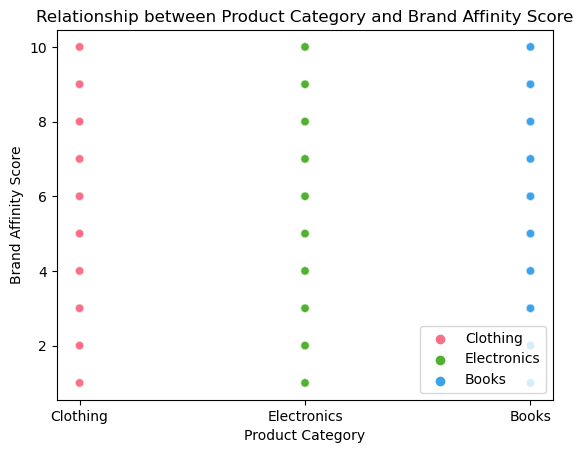

In [23]:
import matplotlib.pyplot as plt

sns.scatterplot(x='Product_Category', y='Brand_Affinity_Score', hue='Product_Category', data=df, alpha=0.5, palette='husl')
plt.xlabel('Product Category')
plt.ylabel('Brand Affinity Score')
plt.title('Relationship between Product Category and Brand Affinity Score')
plt.legend(loc='lower right')
plt.show()
  

•	People who buy clothing have a Brand Affinity Score ranging from 0 to 2, which is relatively low. This suggests that             clothing brands might need to work on building stronger relationships with their customers.

•	People who buy electronics have a moderate Brand Affinity Score ranging from 4 to 6. This indicates a decent level of brand     affinity among electronics customers.

•	People who buy books have a high Brand Affinity Score ranging from 8 to 10. This suggests that book brands have a strong         relationship with their customers.

The scatter plot shows that brand affinity varies across different product categories, with book brands having the strongest relationships with their customers. 

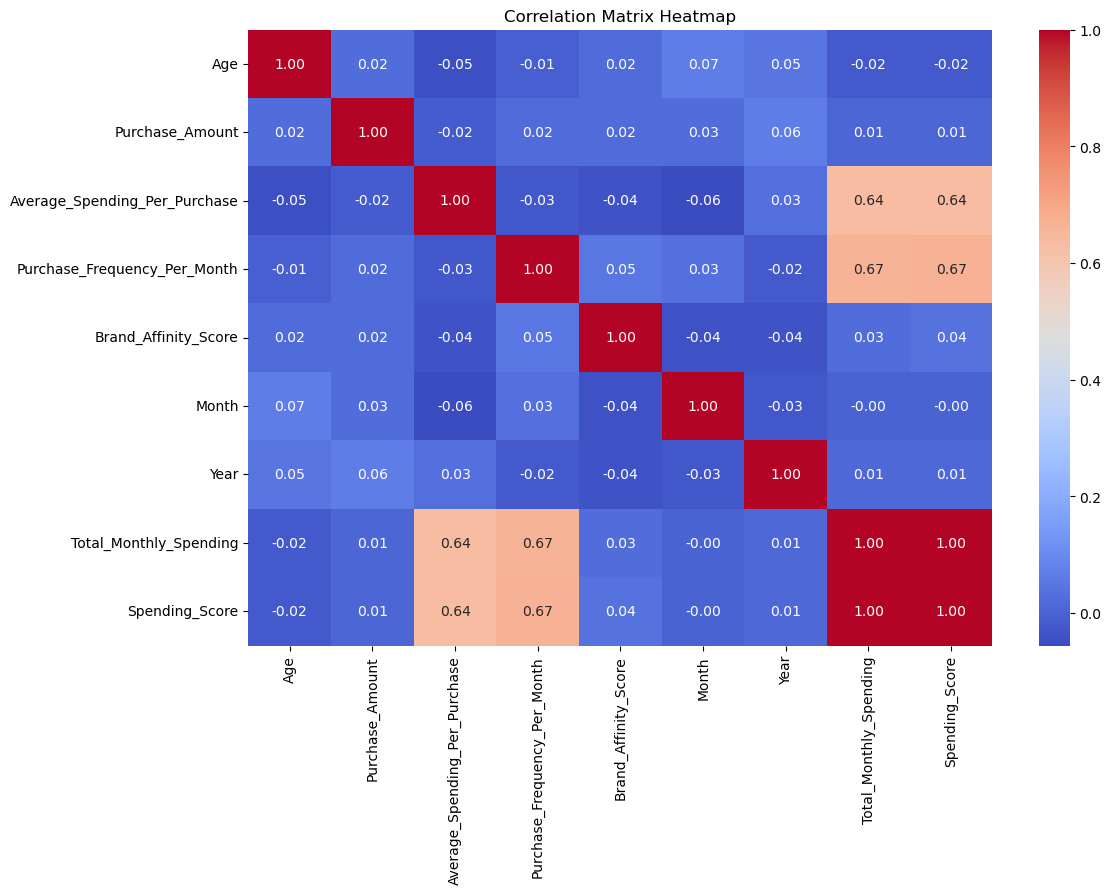

In [24]:
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
correlation_matrix = df[numeric_columns].corr() # Calculate correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix Heatmap')
plt.show()

•	Total Monthly Spending shows strong positive correlations with Average Spending Per Purchase and Spending Score.

•	As the Total Monthly Spending increases, both the Average Spending Per Purchase and Spending Score tend to increase as well.

•	The correlations range from -0.6 to 1.0.

•	All parameters show a perfect positive correlation with themselves (correlation of 1.0).


# 3. Temporal Analysis

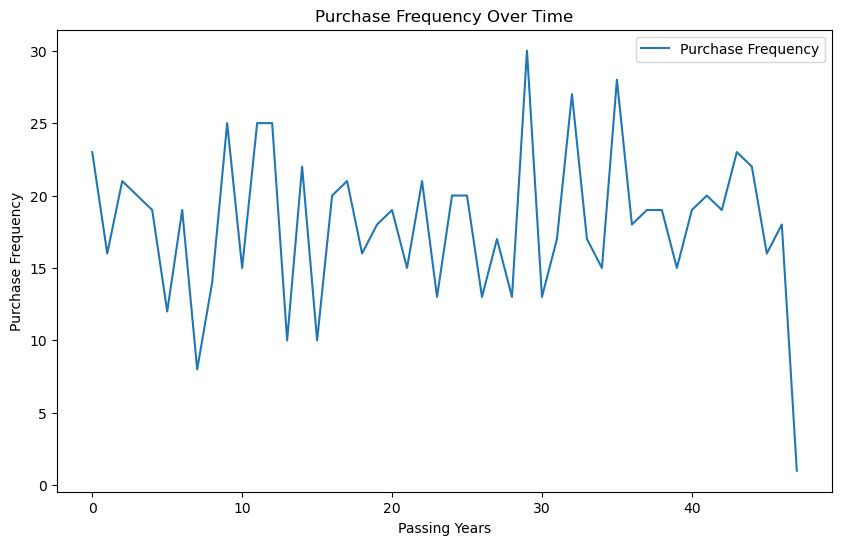

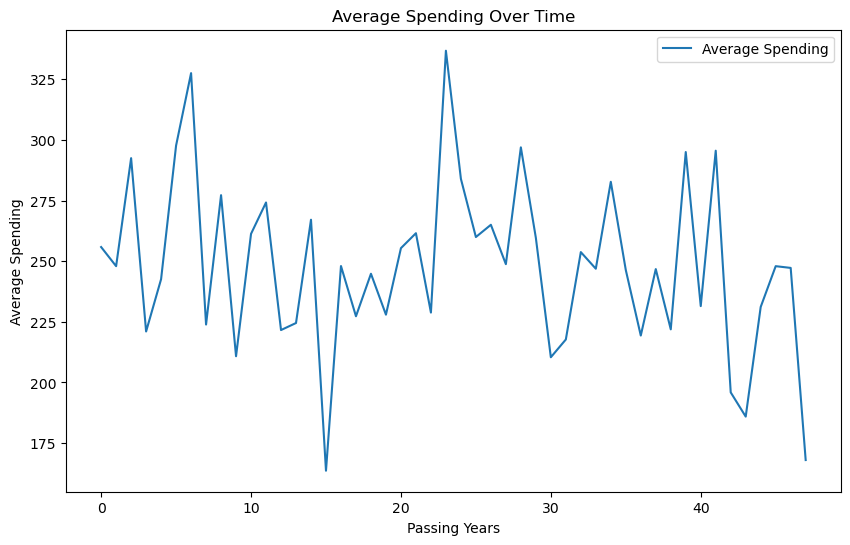

In [25]:
#Customer behavior for Purchase Frequency
df['Purchase_Date'] = pd.to_datetime(df['Purchase_Date'])
df['Purchase_Year'] = df['Purchase_Date'].dt.year
df['Purchase_Month'] = df['Purchase_Date'].dt.month
purchase_frequency = df.groupby(['Purchase_Year', 'Purchase_Month']).size().reset_index(name='Purchase_Frequency')
avg_spending = df.groupby(['Purchase_Year', 'Purchase_Month'])['Purchase_Amount'].mean().reset_index(name='Average_Spending')

plt.figure(figsize=(10, 6))
plt.plot(purchase_frequency['Purchase_Frequency'], label='Purchase Frequency')
plt.title('Purchase Frequency Over Time')
plt.xlabel('Passing Years')
plt.ylabel('Purchase Frequency')
plt.legend()
plt.show()

#Visualizing customer behaviour for average spending
plt.figure(figsize=(10, 6))
plt.plot(avg_spending['Average_Spending'], label='Average Spending')
plt.title('Average Spending Over Time')
plt.xlabel('Passing Years')
plt.ylabel('Average Spending')
plt.legend()
plt.show()



•	The purchase frequency has fluctuated over the years, with noticeable peaks and troughs. However, there’s an overall decline     in purchase frequency after around 30 passing years.

•	The average spending also shows a fluctuating pattern like purchase frequency. However, the decline is less pronounced           compared to purchase frequency. 

These findings suggest that while people might be buying less frequently over time, their average spending per purchase does not decrease as much.


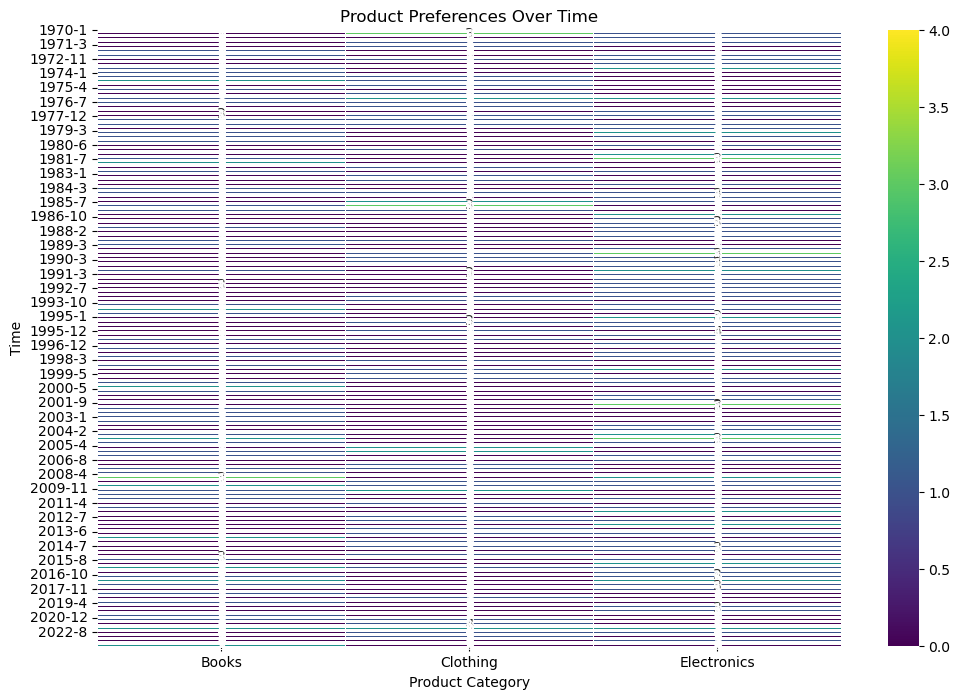

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

preferences = df.groupby(['Year', 'Month', 'Product_Category']).size().reset_index(name='Product_Preferences')
pivot = preferences.pivot_table(index=['Year', 'Month'], columns='Product_Category', values='Product_Preferences', fill_value=0)

plt.figure(figsize=(12, 8))
sns.heatmap(pivot, cmap='viridis', annot=True, fmt='d', linewidths=.5)
plt.title('Product Preferences Over Time')
plt.xlabel('Product Category')
plt.ylabel('Time')
plt.show()


•	The graph shows preferences for three product categories: Books, Clothing, and Electronics.

•	The data spans from 1970 to 2022, providing a comprehensive view of product preferences over more than five decades.

•	The color gradient scale indicates values from 0.0 to 4.0. 

•	There are fluctuations in preferences for all three categories over the years.


# Module 3: Clustering Analysis:


# A. K-Means Clustering:

C:\Users\Hp\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Hp\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Hp\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Hp\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

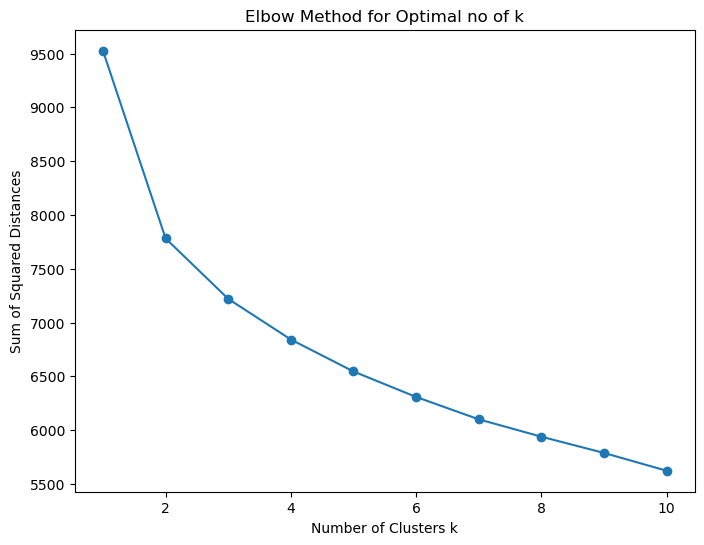

In [27]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns #selects only numeric columns from dataframe
#transformers apply transformation to input data
transformer = StandardScaler() #initialize StandardScaler

# columnTranformer applies tranformation to different numeric cols
preprocessor = ColumnTransformer(     
    transformers=[
        ('num', transformer, numeric_cols)
    ])

base = []  # stores the sum of squared distances
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('kmeans', kmeans)]) #preprocessor applies standard scaler to numeric cols
    pipeline.fit(df[numeric_cols]) 
    base.append(kmeans.inertia_)  # inertia is the sum of squared distances

plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), base, marker='o')
plt.title('Elbow Method for Optimal no of k')
plt.xlabel('Number of Clusters k')
plt.ylabel('Sum of Squared Distances')
plt.show()


C:\Users\Hp\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Hp\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Hp\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Hp\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

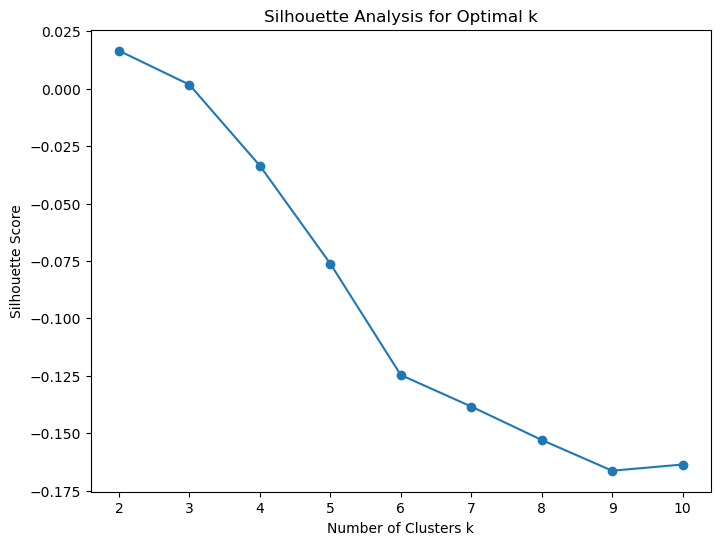

In [28]:
from sklearn.metrics import silhouette_score
#Silhouette Analysis
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
numeric_transformer = StandardScaler()
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_cols)
    ])
k_values = range(2, 11)
scores = []

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('kmeans', kmeans)])
    labels = pipeline.fit_predict(df[numeric_cols])
    silhouette_avg = silhouette_score(df[numeric_cols], labels)
    scores.append(silhouette_avg)

plt.figure(figsize=(8, 6))
plt.plot(k_values, scores, marker='o')
plt.title('Silhouette Analysis for Optimal k')
plt.xlabel('Number of Clusters k')
plt.ylabel('Silhouette Score')
plt.show()


•	The y-axis represents the silhouette score, which is a measure of how similar an object is to its own cluster compared to       other clusters. The score ranges from -0.175 to 0.025.

•	The x-axis represents the number of clusters (k), ranging from 2 to 10.

•	The highest point on the graph corresponds with 2 clusters (k=2), indicating it has the highest Silhouette Score. As the         number of clusters increases from 2 to 10, there’s a general decline in Silhouette Score. This suggests that 2 might be the     optimal number of clusters for this dataset.


In [29]:
optimal_k = 2 
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
transformer = StandardScaler()
preprocessor = ColumnTransformer(
    transformers=[
        ('num', transformer, numeric_cols)
    ])

kmeans = KMeans(n_clusters=optimal_k, random_state=42)
pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('kmeans', kmeans)])
df['cluster'] = pipeline.fit_predict(df[numeric_cols])

print(df[['Customer_ID', 'cluster']])   # print the cluster assignments


C:\Users\Hp\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


                              Customer_ID  cluster
0    b81ee6c9-2ae4-48a7-b283-220eaa244f43        0
2    fdf79bcd-5908-4c90-8501-570ffb5b7648        1
3    878dccba-893a-48f9-8d34-6ed394fa3c9c        0
4    0af0bd81-73cc-494e-aa5e-75c6d0b6d743        1
5    5a4ac4ce-1e09-4ecb-805c-fb676f101385        0
..                                    ...      ...
994  b17a7ab6-f7c6-4f76-81e4-2b7536730065        1
996  2116266d-8d1c-48cc-ac28-e4e675cb2a4d        0
997  562cee08-f909-4e1c-a811-5711f967bea5        0
998  84da2eea-6e9e-46d4-8d94-1e9b0c377d78        1
999  87629baf-a138-4374-be37-8bab776379b8        0

[866 rows x 2 columns]


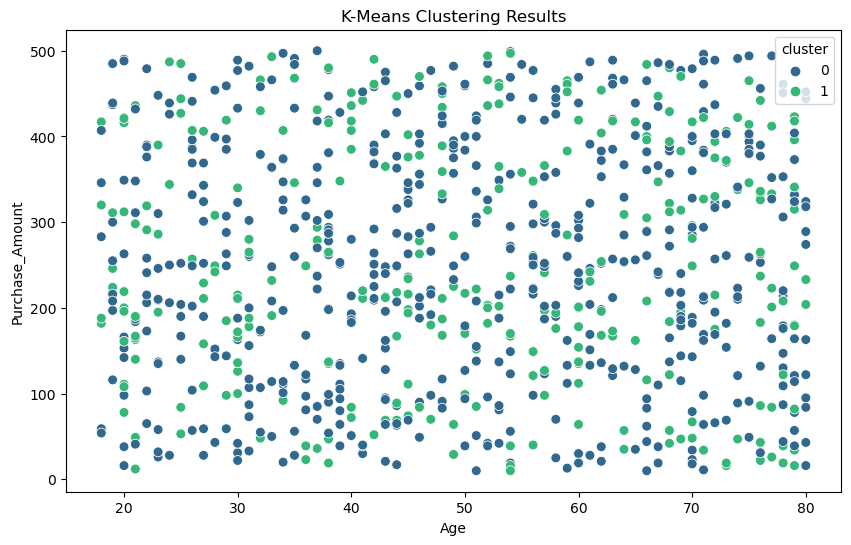

In [30]:
import seaborn as sns

# Assuming 'Customer_ID' is one of your numeric columns
# Adjust the features based on your dataset
feature1 = numeric_cols[0]
feature2 = numeric_cols[1]

# Create a scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x=feature1, y=feature2, hue='cluster', data=df, palette='viridis', s=50)
plt.title('K-Means Clustering Results')
plt.xlabel(feature1)
plt.ylabel(feature2)
plt.show()


•	There are two distinct clusters, labeled as ‘0’ (blue) and ‘1’ (green), scattered throughout the plot.

•	Both clusters are spread across all ages and purchase amounts.


In [31]:
#key features of each cluster
cluster_analysis = df.groupby('cluster')[['Purchase_Amount', 'Brand_Affinity_Score', 'Product_Category_Preferences']].mean()
print(cluster_analysis)


         Purchase_Amount  Brand_Affinity_Score
cluster                                       
0              248.90035              5.243007
1             249.142857              5.431973


C:\Users\Hp\AppData\Local\Temp\ipykernel_31924\373977528.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  cluster_analysis = df.groupby('cluster')[['Purchase_Amount', 'Brand_Affinity_Score', 'Product_Category_Preferences']].mean()


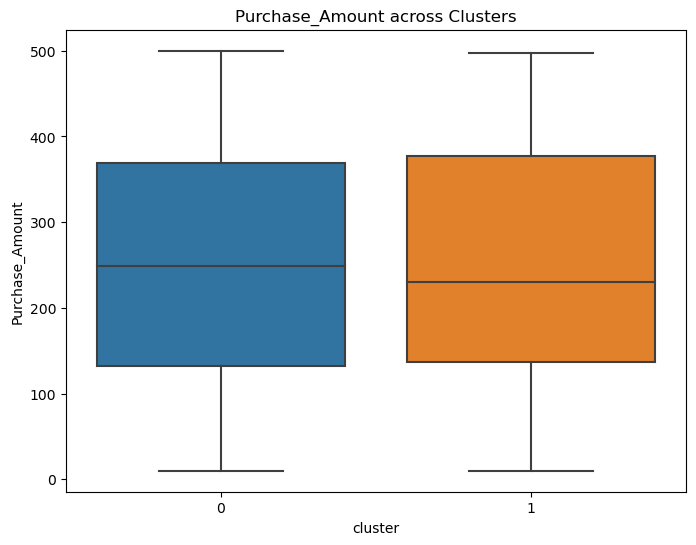

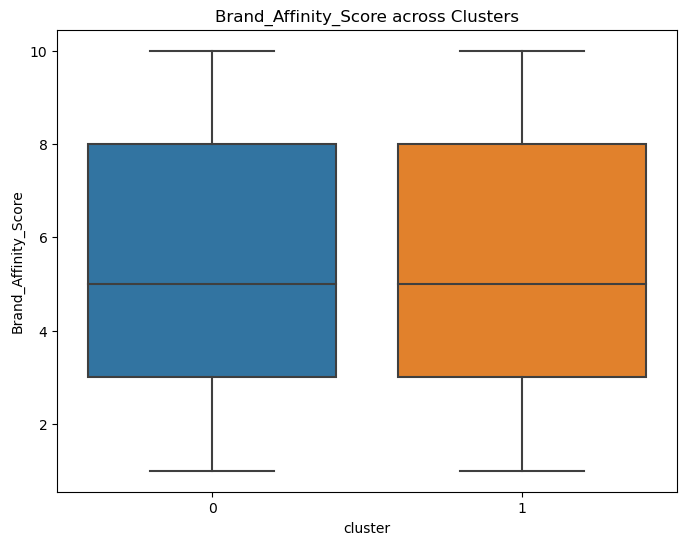

In [32]:
numeric_features = ['Purchase_Amount', 'Brand_Affinity_Score']

# create box plot for each numeric feature by cluster
for feature in numeric_features:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x='cluster', y=feature, data=df)
    plt.title(f'{feature} across Clusters')
    plt.show()


•	The purchase amounts for both clusters are similar. This suggests that the two clusters do not differ significantly in         terms of the total amount spent on purchases.

•	The Brand Affinity Scores for both clusters are also similar. This indicates that the customers in both clusters have a         similar level of affinity or loyalty towards the brand.

So, the two clusters show similar behaviors in terms of purchase amount and brand affinity. This could suggest that the clusters might not be differentiated based on these two factors alone. 


# B. DBSCAN Clustering:

In [33]:
import numpy as np
import pandas as pd
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

cols = ['Purchase_Amount', 'Average_Spending_Per_Purchase', 'Purchase_Frequency_Per_Month']
data_to_normalize = df[cols]

scaler = StandardScaler()
normalized_data = scaler.fit_transform(data_to_normalize)
normalized_df = pd.DataFrame(normalized_data, columns=cols)

eps_values = np.arange(0.1, 1.5, 0.1)
min_samples_values = range(2, 10)
results = []

for eps in eps_values:
    for min_samples in min_samples_values:
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        labels = dbscan.fit_predict(normalized_df)
        if len(set(labels)) > 1 and len(set(labels)) < len(df) - 1:
            silhouette_avg = silhouette_score(normalized_df, labels)
            results.append((eps, min_samples, silhouette_avg))

best_eps, best_min_samples, best_score = max(results, key=lambda item: item[2])
print(f"Best eps: {best_eps}, Best MinPts: {best_min_samples}, Best Silhouette Score: {best_score}")

# Applying DBSCAN with the best parameters
dbscan = DBSCAN(eps=best_eps, min_samples=best_min_samples)
df['DB-Cluster'] = dbscan.fit_predict(normalized_df)

print(df['DB-Cluster'].value_counts())


Best eps: 0.5, Best MinPts: 4, Best Silhouette Score: 0.18584123726255478
 0    862
-1      4
Name: DB-Cluster, dtype: int64


In [34]:
# Applying DBSCAN with the best parameters
dbscan = DBSCAN(eps=best_eps, min_samples=best_min_samples)
df['DB-Cluster'] = dbscan.fit_predict(data_to_normalize)
# Analyze the clusters
print(df.groupby('DB-Cluster').mean())

                  Age  Purchase_Amount  Average_Spending_Per_Purchase  \
DB-Cluster                                                              
-1          49.786374       248.982679                      52.069284   

            Purchase_Frequency_Per_Month  Brand_Affinity_Score     Month  \
DB-Cluster                                                                 
-1                              5.437644              5.307159  6.568129   

                   Year  Total_Monthly_Spending  Spending_Score  \
DB-Cluster                                                        
-1          1996.853349                0.280028        0.278477   

            Income_Level_Encoded  Purchase_Year  Purchase_Month   cluster  
DB-Cluster                                                                 
-1                      1.081986    2021.497691        6.431871  0.339492  


C:\Users\Hp\AppData\Local\Temp\ipykernel_31924\2821213852.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  print(df.groupby('DB-Cluster').mean())


In [35]:
df

,Customer_ID,Age,Gender,Income_Level,Address,Transaction_ID,Purchase_Date,Product_ID,Product_Category,Brand,...,Month,Year,Season,Total_Monthly_Spending,Spending_Score,Income_Level_Encoded,Purchase_Year,Purchase_Month,cluster,DB-Cluster
0,b81ee6c9-2ae4-48a7-b283-220eaa244f43,40,Female,Medium,"43548 Murray Islands Suite 974\nAmyberg, CT 13457",c6a6c712-e36b-406a-bfde-f53bdcf4744f,2022-04-26,d2f767d6-b01a-41a2-87f7-ec1d1186f50e,Clothing,Brand_C,...,1,2010,Winter,0.114721,0.110324,2,2022,4,0,-1
2,fdf79bcd-5908-4c90-8501-570ffb5b7648,57,Other,Low,"79683 Kevin Hill Apt. 555\nJohnshire, AR 39961",462925b1-a5bf-4996-bda2-59749de64eea,2021-12-09,9ab75a68-4329-4bd9-a259-2233c0f34c93,Electronics,Brand_A,...,1,1995,Winter,0.908629,0.900810,1,2021,12,1,-1
3,878dccba-893a-48f9-8d34-6ed394fa3c9c,38,Female,Medium,02998 Hall Meadows Suite 809\nNorth Robertvill...,3cfafa02-6b34-4d77-9e05-d223dfab64e8,2022-12-03,d518569b-ff79-494b-b2b6-7e2af39db86a,Clothing,Brand_C,...,9,2012,Fall,0.290355,0.287449,2,2022,12,0,-1
4,0af0bd81-73cc-494e-aa5e-75c6d0b6d743,68,Other,Medium,"21411 Timothy Ford Apt. 320\nDavisborough, AR ...",0d8dc27a-0c8f-4a82-b57e-8bf54cee9759,2020-06-08,b6deac9d-2b7e-4a51-8273-a6534910b3bc,Books,Brand_B,...,1,2010,Summer,0.598985,0.593117,2,2020,6,1,-1
5,5a4ac4ce-1e09-4ecb-805c-fb676f101385,26,Other,High,"843 John Knoll Suite 876\nRodriguezmouth, MO 3...",5b0d927b-a342-4df1-8846-a1acc62e2842,2022-12-03,03f82332-801c-45e2-84bf-af10a8f60248,Books,Brand_A,...,8,1989,Spring,0.037563,0.037449,0,2022,12,0,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
994,b17a7ab6-f7c6-4f76-81e4-2b7536730065,65,Female,High,"0676 Gonzalez Pike Apt. 421\nAmymouth, ND 66046",0f8a3f06-1234-4774-8b2f-14d159567ea1,2022-02-11,23a4c4aa-a0bb-44ae-a5fd-817420f96b91,Clothing,Brand_B,...,6,1990,Winter,0.499492,0.495951,0,2022,2,1,-1
996,2116266d-8d1c-48cc-ac28-e4e675cb2a4d,78,Female,Low,"45710 Wilson Circles Apt. 411\nWalterton, NC 8...",51f771bf-2562-46c1-a25d-2f46f4bb1525,2023-08-30,546d8d8f-1498-4aa9-8123-29550d911a17,Books,Brand_B,...,9,1977,Winter,0.156345,0.152834,1,2023,8,0,-1
997,562cee08-f909-4e1c-a811-5711f967bea5,63,Male,High,"243 Emily Creek\nSouth Lindaport, CO 81594",74eba598-ee91-4396-a137-6b869702ef29,2023-08-30,8b6ffec8-de54-445c-90d0-1399858b2e16,Electronics,Brand_C,...,12,1995,Summer,0.195939,0.198381,0,2023,8,0,-1
998,84da2eea-6e9e-46d4-8d94-1e9b0c377d78,43,Male,High,"1129 Kirby Ferry Suite 743\nBillyfurt, UT 41587",4d2e213e-bcc0-4a8a-9501-6ca8361381c4,2021-05-13,51ed2d86-c9ab-4922-a8ff-469acf6ac91e,Clothing,Brand_C,...,3,2000,Fall,0.790863,0.789474,0,2021,5,1,-1


# C. K-Means++ Clustering:


C:\Users\Hp\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


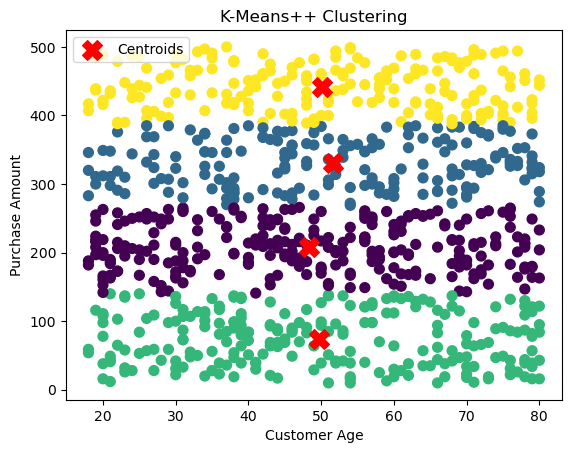

In [36]:
numeric_cols = df.select_dtypes(include=[np.number]).columns
X = df[numeric_cols]

clusters = 4  

# Apply K-Means++ clustering
kmeans_pp = KMeans(n_clusters=clusters, init='k-means++', random_state=42)
kmeans_pp.fit(X)
labels = kmeans_pp.labels_
centroids = kmeans_pp.cluster_centers_

plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=labels, cmap='viridis', s=50)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='X', s=200, label='Centroids')
plt.title('K-Means++ Clustering')
plt.xlabel('Customer Age')
plt.ylabel('Purchase Amount')
plt.legend()
plt.show()

•	The x-axis represents “Customer Age” ranging from 0 to 80, and the y-axis represents “Purchase Amount” ranging from 0 to         500.

•	There are four distinct clusters of data points, each marked with a red ‘X’ centroid. 

This suggests that the K-Means++ algorithm has identified four distinct groups within the data. Each group represents a cluster of customers who have similar ages and purchase amounts. This could be useful for segmenting the customer base and tailoring marketing strategies to each group. 


C:\Users\Hp\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Hp\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


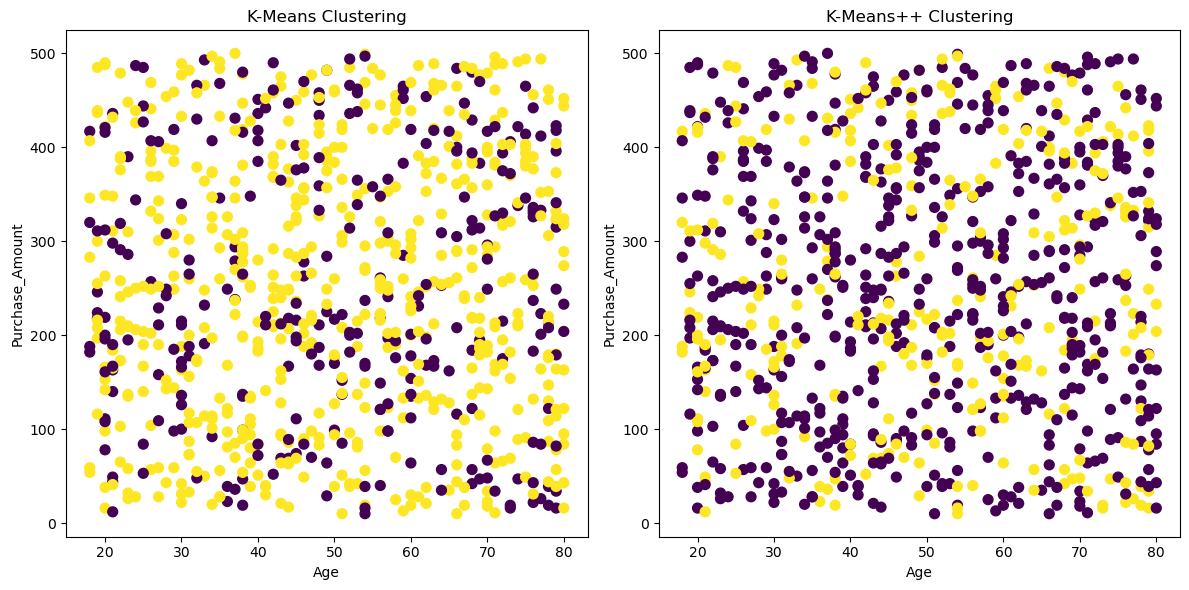

In [37]:
    #Comparison of kmeans and kmeans++

optimal_k = 2
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns

kmeans = KMeans(n_clusters=optimal_k, random_state=42, init='random')
pipeline_kmeans = Pipeline(steps=[
    ('preprocessor', ColumnTransformer(transformers=[('num', StandardScaler(), numeric_cols)])),
    ('kmeans', kmeans)
])
df['cluster_kmeans'] = pipeline_kmeans.fit_predict(df[numeric_cols])

kmeans_pp = KMeans(n_clusters=optimal_k, init='k-means++', random_state=42)
pipeline_kmeans_pp = Pipeline(steps=[
    ('preprocessor', ColumnTransformer(transformers=[('num', StandardScaler(), numeric_cols)])),
    ('kmeans', kmeans_pp)
])
df['cluster_kmeans_pp'] = pipeline_kmeans_pp.fit_predict(df[numeric_cols])

# Visualize the results
plt.figure(figsize=(12, 6))

# Scatter plot for K-means clustering
plt.subplot(1, 2, 1)
plt.scatter(df[numeric_cols[0]], df[numeric_cols[1]], c=df['cluster_kmeans'], cmap='viridis', s=50)
plt.title('K-Means Clustering')
plt.xlabel(numeric_cols[0])
plt.ylabel(numeric_cols[1])

# Scatter plot for K-means++ clustering
plt.subplot(1, 2, 2)
plt.scatter(df[numeric_cols[0]], df[numeric_cols[1]], c=df['cluster_kmeans_pp'], cmap='viridis', s=50)
plt.title('K-Means++ Clustering')
plt.xlabel(numeric_cols[0])
plt.ylabel(numeric_cols[1])

plt.tight_layout()
plt.show()


•	The x-axis represents “Age” ranging from 0 to 80, and the y-axis represents “Purchase Amount” ranging from 0 to 500.

•	In both plots, there are two distinct clusters of data points.

•	In the left plot, the clusters are scattered across the plot, and the boundary between them is not very clear.

•	In the right plot, the clusters appear more defined compared to the left plot.

This suggests that the K-Means++ algorithm might have performed better in distinguishing the clusters based on age and purchase amount.


# Module 4: Comparison and Conclusion:


# 1. Clustering Algorithms Comparison 

### K-Means Similarities

1. K-Means also forms centroid-based clusters just like kmeans++
2. Both K-Means and K-Means++ partition the data into non-overlapping clusters.

### K-Means Differences

1. For Initialization, K-Means uses random values, which can lead to sensitivity to initial centroids.
2. Kmeans assumes that clusters are spherical and equally sized, which may not always be the case in real-world data.

### K-Means++ Similarities

1. Similar to K-Means, K-Means++ forms centroid-based clusters.
2. Both K-Means and K-Means++ use partitioning-based approaches.

### K-Means++ Differences

1. K-Means++ uses smarter initialization method, reducing sensitivity to initial centroids.
2. K-Means++ converges faster than K-Means due to better initialization.

### DBSCAN Similarities

1. Like K-Means and K-Means++, DBSCAN partitions the data into clusters.
2. DBSCAN also partitions the data into clusters just like kmeans and kmeans++.

### DBSCAN Differences

1. Unlike K-Means and K-Means++, DBSCAN is density-based, forming clusters based on the density of data points.
2. DBSCAN can identify clusters with irregular shapes and sizes, while K-Means assumes spherical clusters.

## Metrices Comparison

### Silhouette Score:

The silhouette score measures how similar an object is to its own cluster (cohesion) compared to other clusters (separation).

Ranges from -1 to 1, with higher values indicating better-defined clusters.

### Calinski-Harabasz Score:

The Calinski-Harabasz index measures the ratio of between-cluster variance to within-cluster variance.

Higher values indicate better-defined, well-separated clusters.

### Davies-Bouldin Index:

The Davies-Bouldin index measures the average similarity between each cluster and its most similar cluster.

Lower values indicate better clustering; 0 indicates perfect clustering.

C:\Users\Hp\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


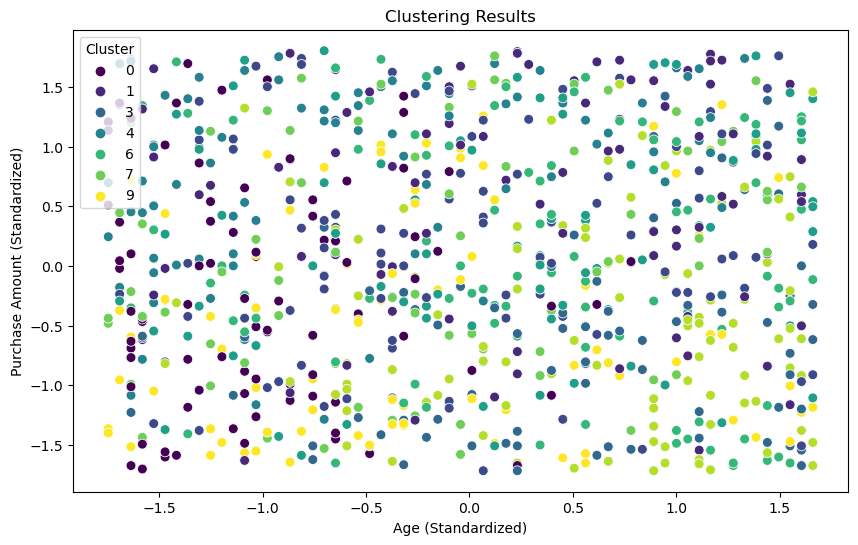

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
numeric_transformer = StandardScaler()
preprocessor = Pipeline(steps=[('num', numeric_transformer)])
df_preprocessed = pd.DataFrame(preprocessor.fit_transform(df[numeric_cols]), columns=numeric_cols)

algorithm = KMeans(n_clusters=k, random_state=42)
labels = algorithm.fit_predict(df_preprocessed)

plt.figure(figsize=(10, 6))
sns.scatterplot(x='Age', y='Purchase_Amount', data=df_preprocessed, hue=labels, palette='viridis', s=50)
plt.title('Clustering Results')
plt.xlabel('Age (Standardized)')
plt.ylabel('Purchase Amount (Standardized)')
plt.legend(title='Cluster')
plt.show()


# Advantages and Disadvantages of each Algorithm

## K-Means

### Advantages

1. K-Means is easy to understand and implement.
2. Efficient for large datasets and a relatively low number of clusters.
3. Converges quickly.
4. The cluster centroids can be interpreted as representative points.

### Disadvantages

1. It struggles with non-spherical or irregularly shaped clusters.
2. Results may vary based on the initial centroids.
3. Requires specifying the number of clusters in advance.
4. Sensitive to outliers that can significantly impact cluster centroids.

## K-Means++

### Advantages

1. Addresses sensitivity to initial centroids through smarter initialization.
2. Often converges faster than traditional K-Means.
3. Reduces sensitivity to the choice of initial centroids.

### Disadvantages

1. More complex than the original K-Means algorithm.
2. It does not guarantee finding the global optimum.

## DBSCAN

### Advantages

1. It is well-suited for identifying clusters of varying shapes and sizes.
2. It identifies outliers as noise points outside dense regions.
3. It does not assume any specific shape for clusters.

### Disadvantages

1. It struggles with datasets containing clusters of varying densities.
2. Its performance is degraded in high-dimensional spaces.

# 2. Conclusions and Recommendations:

### Findings on EDA and Clustering Analysis

Following are the insights into customer segments based on EDA findings:

•	Most customers fall into two main age brackets—around 20 years old and between 50 to 60 years old.

•	People mostly buy things that are either cheap (costing 0-100 units) or quite expensive (costing 400-500 units).

•	Customers tend to make purchases either twice a month or eight times a month.

These details help to understand the ages of the customers, what price range they usually spend in, and how often they make purchases.


The clustering analysis has identified distinct customer segments within the electronics section. These segments are based on various factors such as purchase behavior, brand affinity, and product category preferences.


### Key Factors that Differentiate Customer Segments and their Purchasing Behaviour

•	The key factors that differentiate customer segments include age, income level, brand affinity, and product category preferences. 

•	These factors contribute to the unique purchasing behavior patterns observed in each segment.

•	By analyzing customer data, we found distinct groups that shop differently and have diverse preferences for brands and products.

•	By knowing what they like and when they buy, we can create special offers that match their interests and increase their loyalty.

•	Different groups of customers buy things in different ways. For example, one group might really like fancy electronics and spend more money on average, while another group might care more about prices and go for budget-friendly options.


### Data-Driven Strategies for Customer Retention and Sales Growth Recommendations

•	Implement dynamic pricing strategies based on the price sensitivity of each customer segment like offering discounts, promotions, or loyalty rewards for attracting more customers.

•	Regularly collect feedback from customers within each segment to understand their evolving needs and expectations. A responsive approach to customer feedback can enhance satisfaction and contribute to long-term retention.

•	Choose communication channels based on the preferences of each segment. Some segments may respond better to email campaigns, while others might prefer social media or mobile notifications.


### Applications of Clustering Results

•	Apply clustering results to personalize content across various channels, such as websites, emails, and mobile apps. This enhances the overall customer experience and engagement.

•	Analyze the customer journey for each cluster to identify areas for optimization. This ensures a smoother and more personalized journey for customers in each segment.

•	Design marketing campaigns specific to each segment, addressing their unique preferences and needs.

•	Identify cross-selling opportunities within and between segments. Recommend complementary products or accessories based on the purchase history of each segment, encouraging customers to explore and purchase additional items.

•	Customize marketing strategies based on the geographical distribution of each cluster. This ensures that campaigns are culturally relevant and resonate with specific geographic clusters.


### Further Analysis and Investigations

•	Conduct a deeper analysis of the impact of external factors (e.g., economic conditions, technological trends) on customer behavior within the electronics section.

•	Explore customer feedback and reviews to understand sentiment and satisfaction levels within each segment.

•	Continuously monitor and update customer segments as preferences and trends evolve over time.

•	Regularly review and update the product offerings based on the changing preferences of each segment.

•	Implement feedback mechanisms to gather insights directly from customers, helping to refine product selection and improve customer satisfaction.
